In [1]:
from pattern_regression import *

In [2]:
# SETTINGS
patterns_csv = '../datasets/pvc_allregions_uptake_change_bilateral.csv'
lut_file = "../FreeSurferColorLUT.txt"
master_csv = '../FDG_AV45_COGdata/FDG_AV45_COGdata_01_06_16.csv'
membership_conf = 0.50
components = 100
ref_key = 'WHOLE_CEREBELLUM'
threshold = 1.2813
# ref_key = 'COMPOSITE_REF'
# threshold = 0.91711

# parse input
pattern_prior_df, pattern_post_df, uptake_prior_df, uptake_post_df, result_df, rchange_df = parseRawInput(patterns_csv, ref_key)

# # Calculate
# result_df = trainDPGMM(components, pattern_prior_df, pattern_post_df, result_df)

# Load
model_file = '../dpgmm_alpha15.4_bilateral_model.pkl'
best_model = cPickle.load(open(model_file, 'rb'))
alpha = best_model.alpha
result_df = loadResults(alpha, master_csv)

# generate conversion data
big_groups = bigGroups(result_df, threshold=3)
small_groups = smallGroups(result_df, threshold=50)
medium_groups = list(set(big_groups) & set(small_groups))
conversions = parseConversions(big_groups, result_df, threshold, master_keys)
conversions.to_csv('%s_conversions.csv' % generateFileRoot(alpha))
positive_patterns = list(conversions[conversions['pos-pos']>=0.8].index)
negative_patterns = list(conversions[conversions['neg-neg']>=0.9].index)
transition_patterns = list(set(conversions.index) - (set(positive_patterns) | set(negative_patterns)))
groups = {'positive': positive_patterns, 'negative': negative_patterns, 'transition': transition_patterns}
uptake_members, pattern_members, change_members, prior_members = mergeResults(result_df, pattern_prior_df, pattern_post_df, uptake_prior_df, uptake_post_df, rchange_df)

# create giant dataframe of merged results
uptake_tp, pattern_tp, change_tp, prior_tp = mergeResults(result_df, pattern_prior_df, pattern_post_df, uptake_prior_df, uptake_post_df, rchange_df, with_timepoint=True)
merged_members = prior_tp.copy().reset_index()
merged_members = merged_members.merge(uptake_tp[pattern_keys].reset_index(), on=['rid','timepoint'], how='outer')
merged_members = merged_members.merge(change_tp[change_keys].reset_index(), on=['rid','timepoint'], how='outer')
all_keys = master_keys+summary_keys+pattern_keys+change_keys


15.3967378869
15.3967378869


pattern_regression.py:313: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  uptake_prior_df.dropna(inplace=True)
pattern_regression.py:317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  uptake_post_df.dropna(inplace=True)


In [3]:
bl_changes = [('FSX_HC/ICV_BL_3months', 'FSX_HC/ICV_slope'),
              ('UW_EF_BL_3months','UW_EF_slope'),
              ('UW_MEM_BL_3months','UW_MEM_slope'),
              ('WMH_percentOfICV_AV45_6MTHS','WMH_percentOfICV_slope'),
              ('FDG_PONS_AV45_6MTHS','FDG_postAV45_slope'),
              ('CSF_TAU_closest_AV45','CSF_TAU_slope'),
              ('CSF_ABETA_closest_AV45','CSF_ABETA_slope'),]
to_scatter = [('CORTICAL_SUMMARY_prior', 'CORTICAL_SUMMARY_change')]
for bl, change in bl_changes:
    to_add = [('CORTICAL_SUMMARY_prior', bl),
              ('CORTICAL_SUMMARY_prior', change),
              ('CORTICAL_SUMMARY_change', change),
              (bl, change)]
    to_scatter += to_add

In [4]:
matplotlib inline

SLOPE_Z: -0.05947, SLOPE_P: 0.95258, INT_Z: 0.07624, INT_P: 0.93923
SLOPE_Z: 0.00777, SLOPE_P: 0.9938, INT_Z: -0.00799, INT_P: 0.99363
SLOPE_Z: -0.02442, SLOPE_P: 0.98052, INT_Z: 0.00047, INT_P: 0.99963
SLOPE_Z: -0.0664, SLOPE_P: 0.94706, INT_Z: 0.00043, INT_P: 0.99965
SLOPE_Z: 2.34063, SLOPE_P: 0.01925, INT_Z: -3.16727, INT_P: 0.00154
SLOPE_Z: -1.9951, SLOPE_P: 0.04603, INT_Z: 2.40563, INT_P: 0.01614
SLOPE_Z: 2.72643, SLOPE_P: 0.0064, INT_Z: -0.09694, INT_P: 0.92277
SLOPE_Z: 0.78615, SLOPE_P: 0.43178, INT_Z: -0.74757, INT_P: 0.45472
SLOPE_Z: -1.46521, SLOPE_P: 0.14286, INT_Z: 1.66982, INT_P: 0.09495
SLOPE_Z: 0.15252, SLOPE_P: 0.87878, INT_Z: -0.21506, INT_P: 0.82972
SLOPE_Z: 0.53648, SLOPE_P: 0.59163, INT_Z: -0.00873, INT_P: 0.99303
SLOPE_Z: 0.12523, SLOPE_P: 0.90034, INT_Z: -0.10192, INT_P: 0.91882
SLOPE_Z: 0.12685, SLOPE_P: 0.89906, INT_Z: -0.15258, INT_P: 0.87873
SLOPE_Z: 0.11945, SLOPE_P: 0.90492, INT_Z: -0.14343, INT_P: 0.88595
SLOPE_Z: 0.0109, SLOPE_P: 0.9913, INT_Z: -0.00536, I

/Users/andyhorng/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


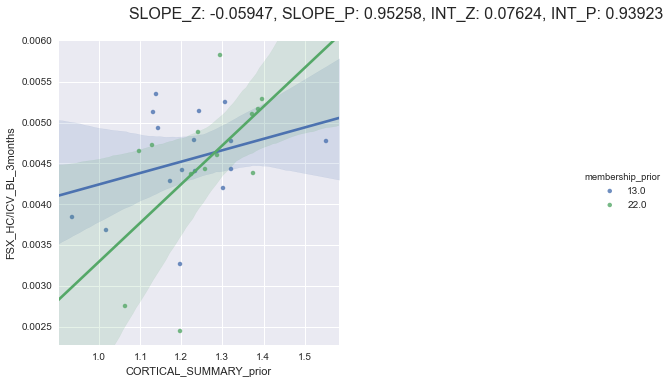

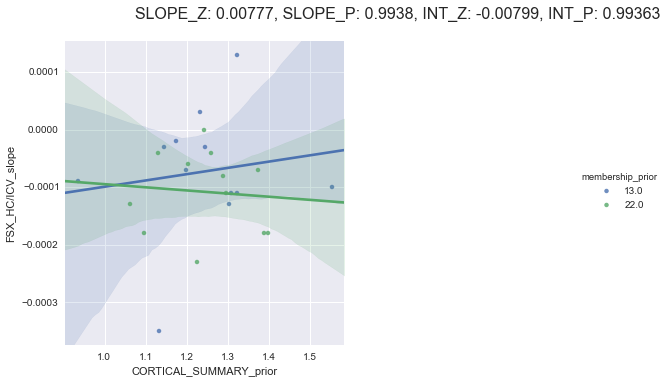

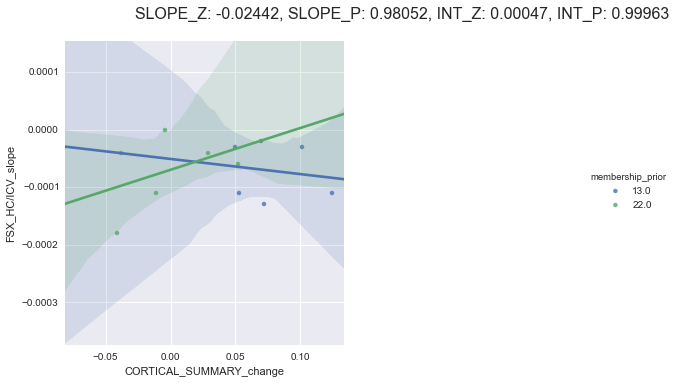

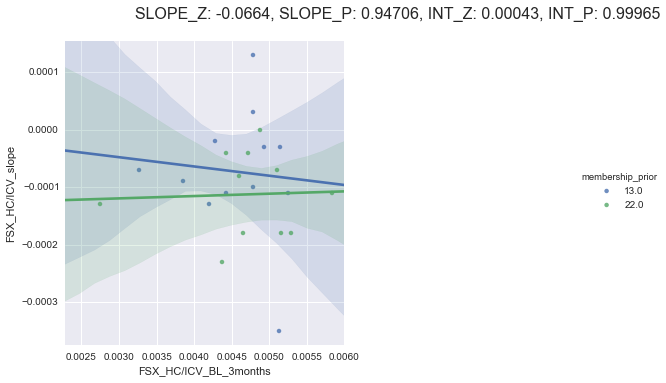

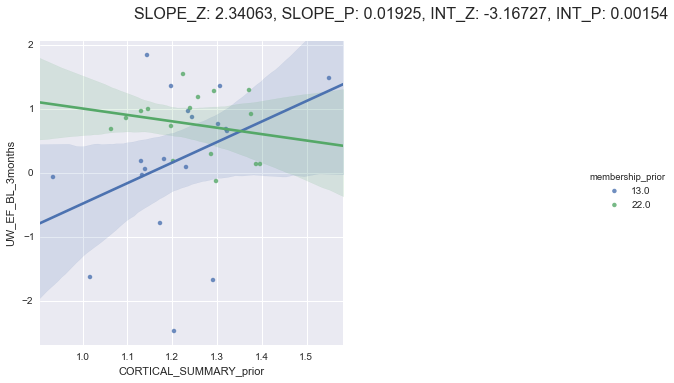

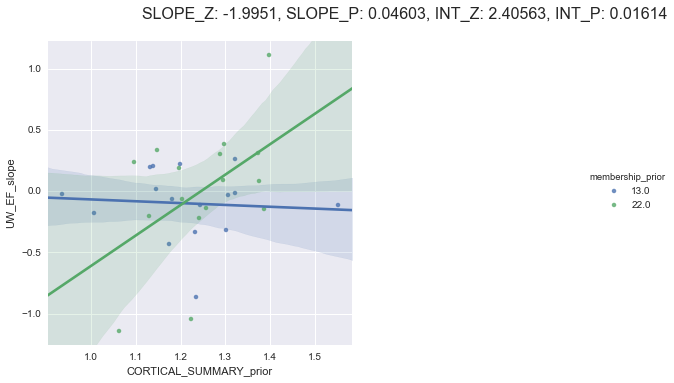

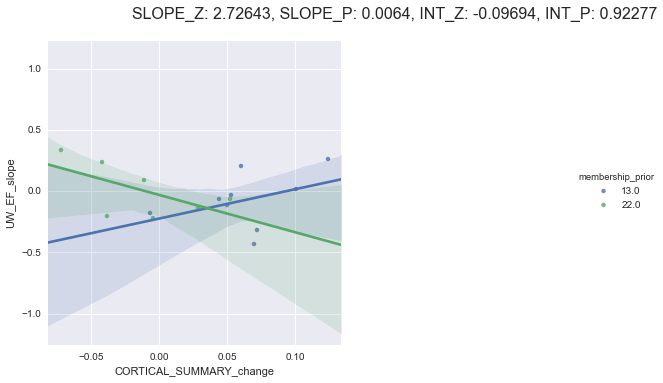

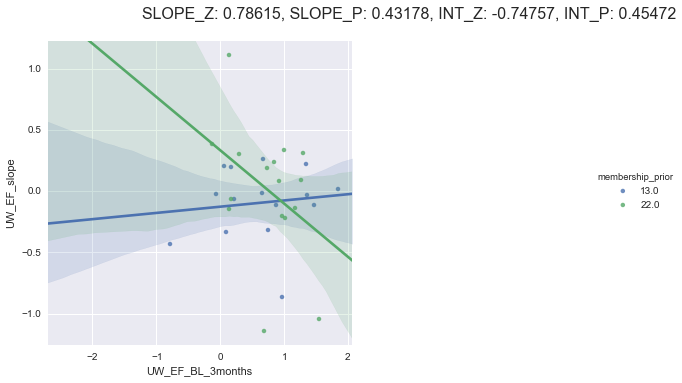

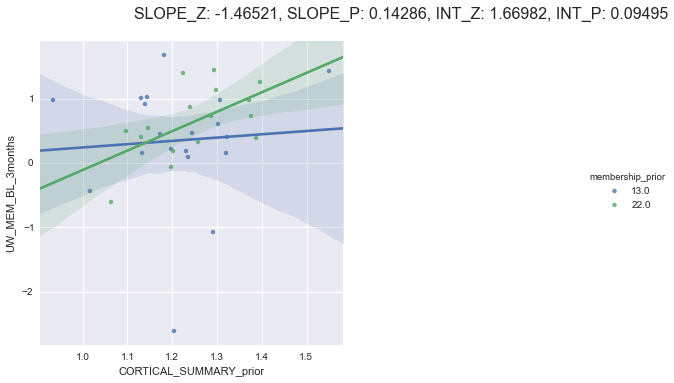

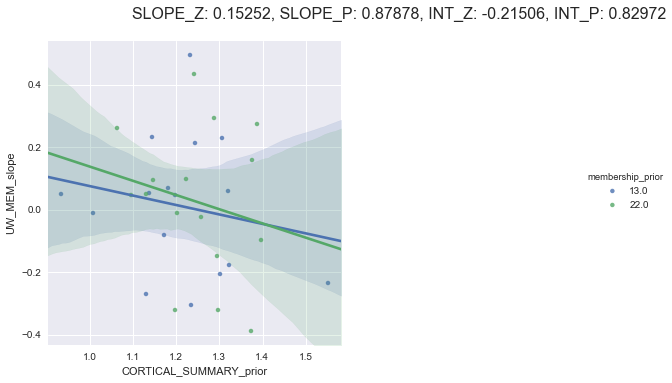

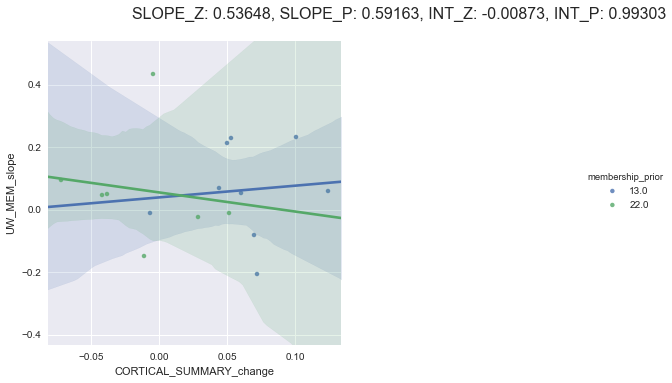

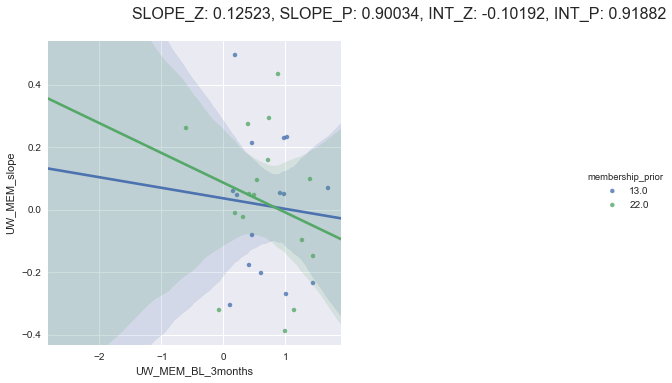

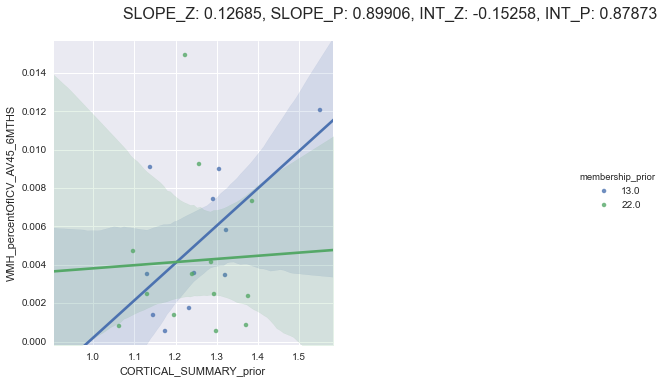

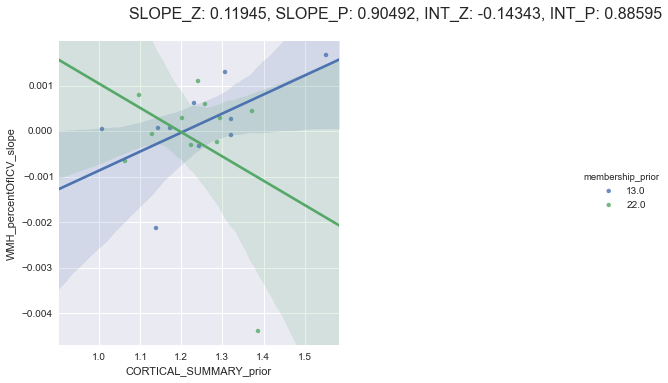

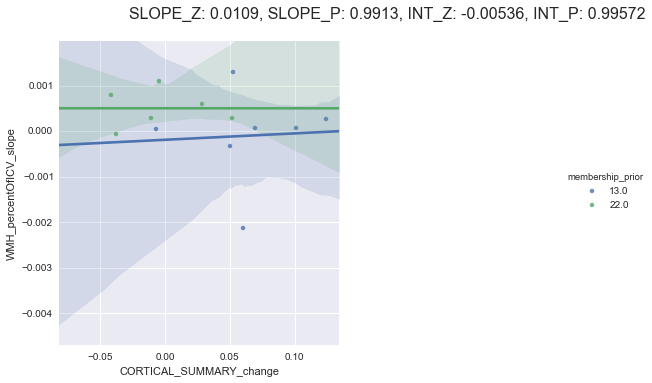

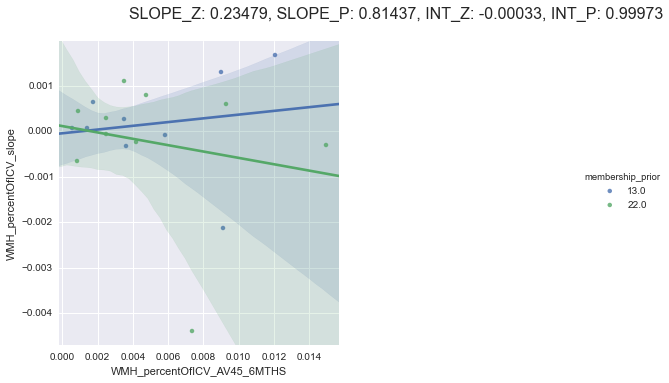

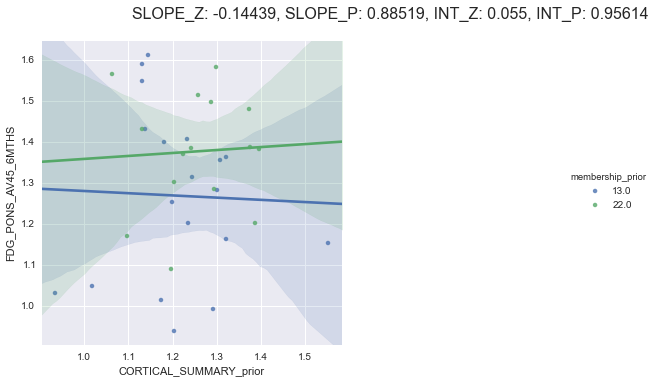

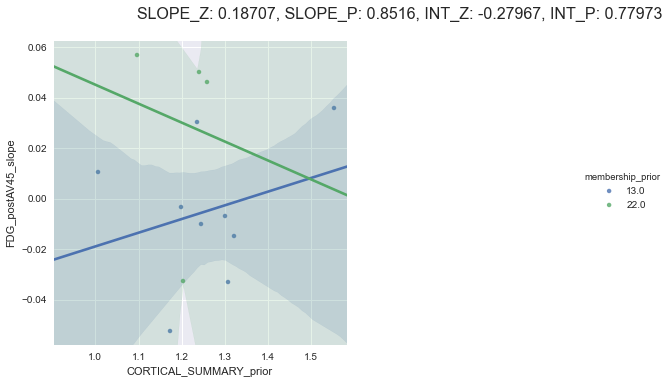

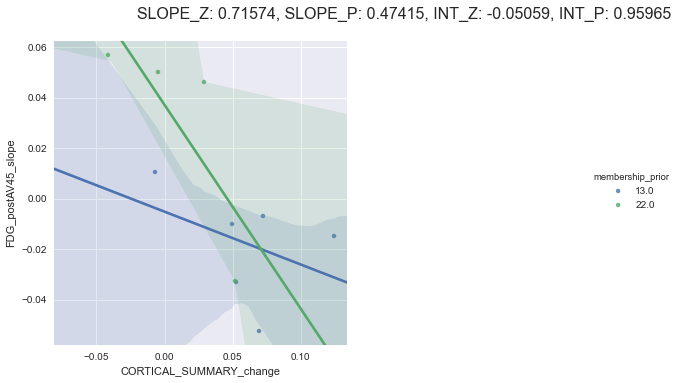

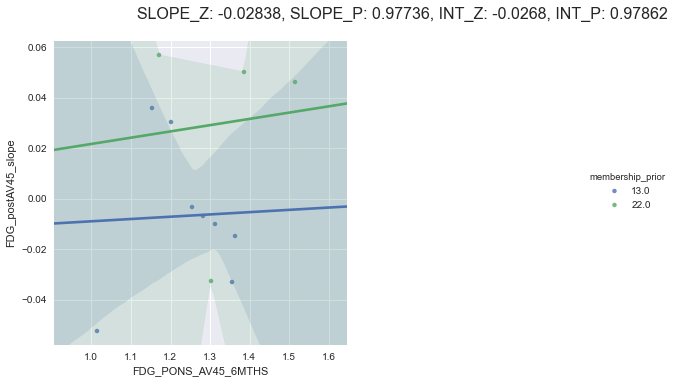

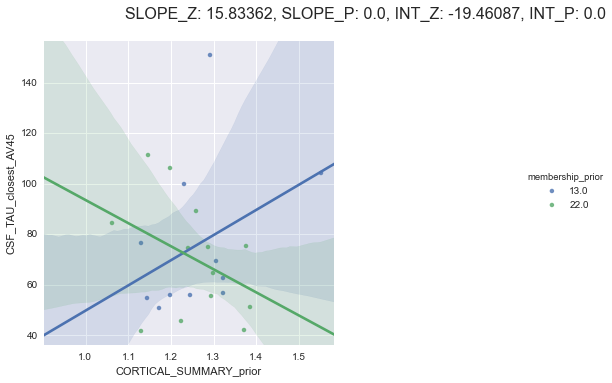

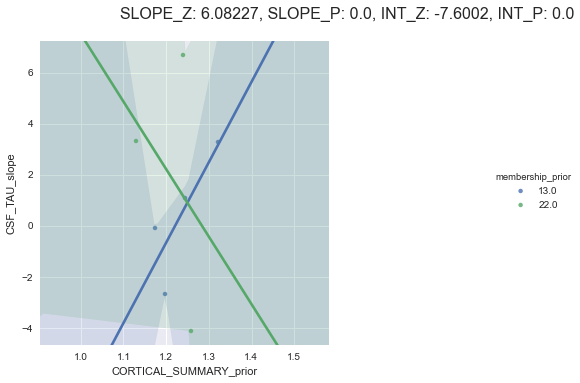

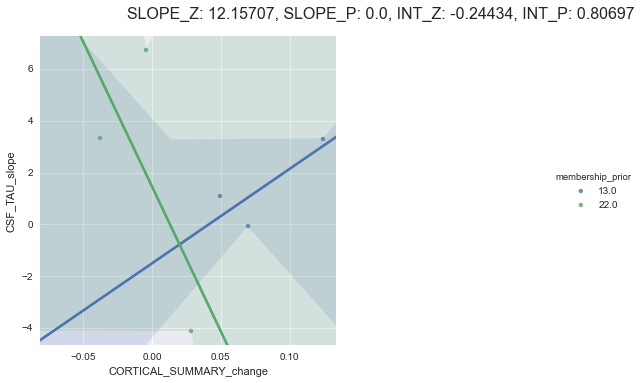

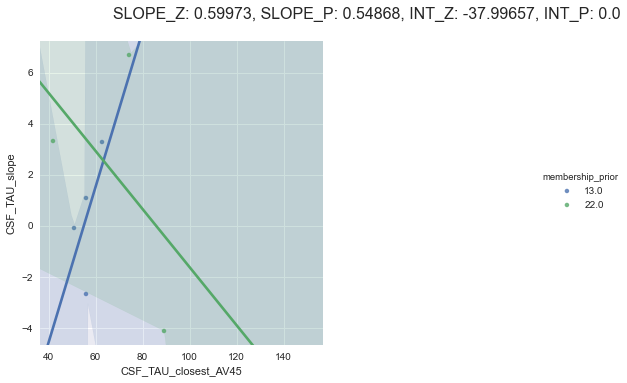

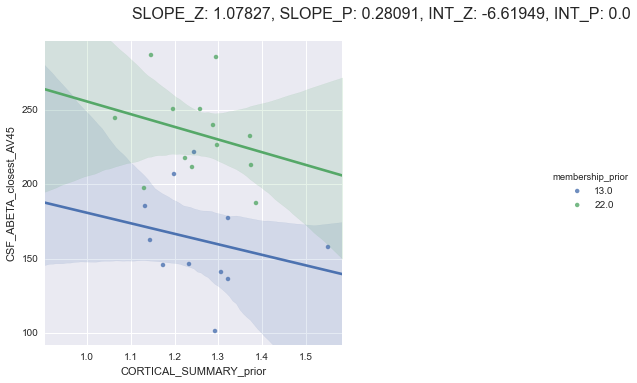

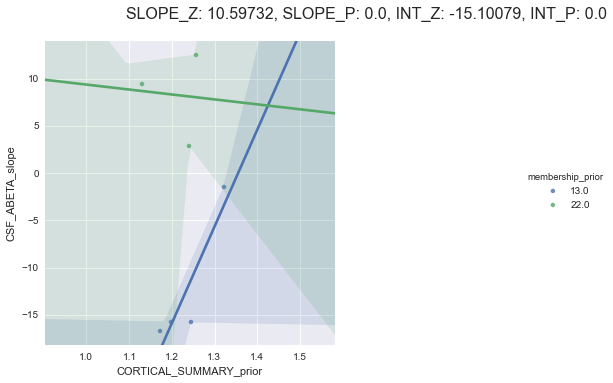

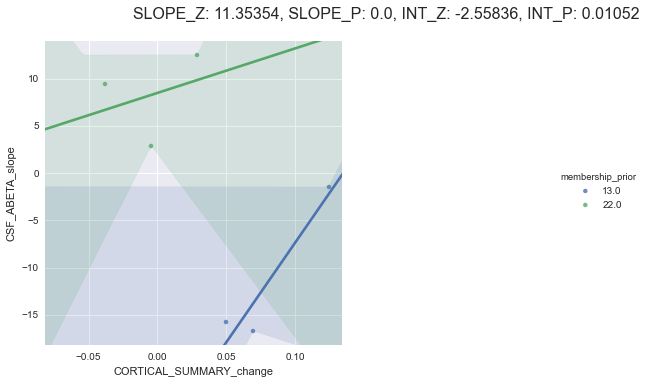

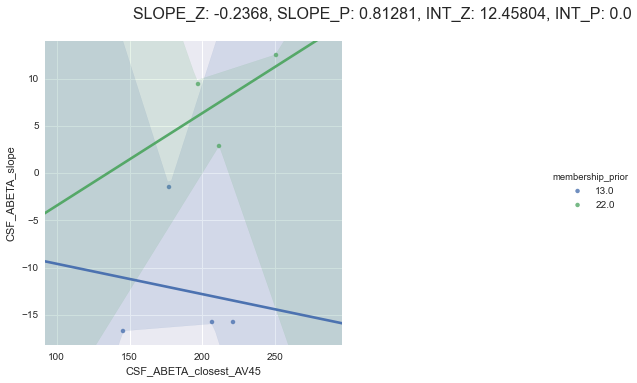

In [5]:
plotValueScatter(result_df, [13,22], xys=to_scatter, fit_reg=True, test=True)

SLOPE_Z: -0.00368, SLOPE_P: 0.99707, INT_Z: 0.02562, INT_P: 0.97956
SLOPE_Z: 0.00405, SLOPE_P: 0.99677, INT_Z: -0.00452, INT_P: 0.99639
SLOPE_Z: 0.00624, SLOPE_P: 0.99502, INT_Z: -8e-05, INT_P: 0.99994
SLOPE_Z: 0.18519, SLOPE_P: 0.85308, INT_Z: -0.00075, INT_P: 0.9994
SLOPE_Z: -1.07862, SLOPE_P: 0.28076, INT_Z: 1.81222, INT_P: 0.06995
SLOPE_Z: 0.0061, SLOPE_P: 0.99513, INT_Z: 0.05267, INT_P: 0.958
SLOPE_Z: -0.46263, SLOPE_P: 0.64363, INT_Z: 0.01292, INT_P: 0.98969
SLOPE_Z: 0.02266, SLOPE_P: 0.98192, INT_Z: 0.11771, INT_P: 0.9063
SLOPE_Z: -0.91539, SLOPE_P: 0.35999, INT_Z: 1.92868, INT_P: 0.05377
SLOPE_Z: -0.04098, SLOPE_P: 0.96731, INT_Z: 0.23401, INT_P: 0.81497
SLOPE_Z: -0.69557, SLOPE_P: 0.4867, INT_Z: 0.0719, INT_P: 0.94268
SLOPE_Z: -0.21154, SLOPE_P: 0.83246, INT_Z: 0.22401, INT_P: 0.82275
SLOPE_Z: -0.04338, SLOPE_P: 0.9654, INT_Z: 0.07998, INT_P: 0.93625
SLOPE_Z: 0.00139, SLOPE_P: 0.99889, INT_Z: 0.00888, INT_P: 0.99291
SLOPE_Z: -0.01112, SLOPE_P: 0.99113, INT_Z: -0.00014, INT_P: 

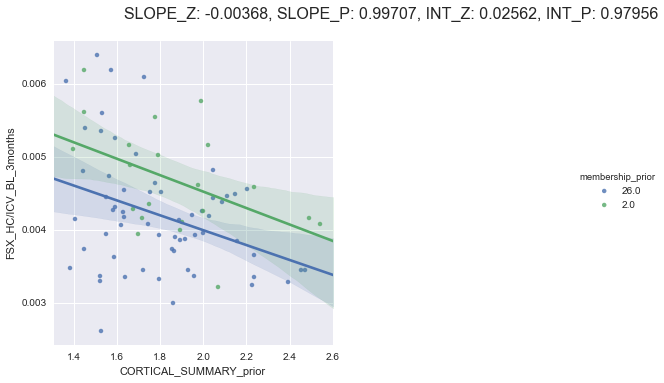

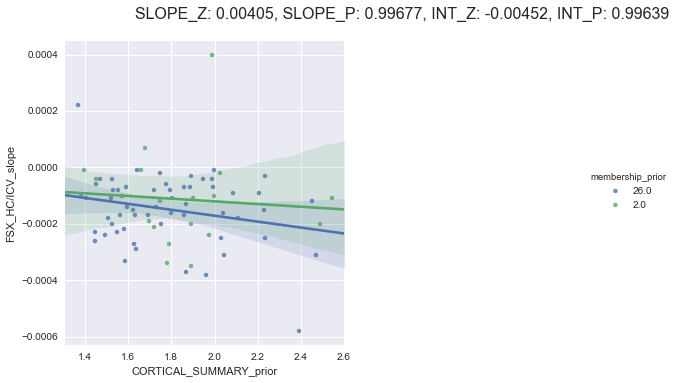

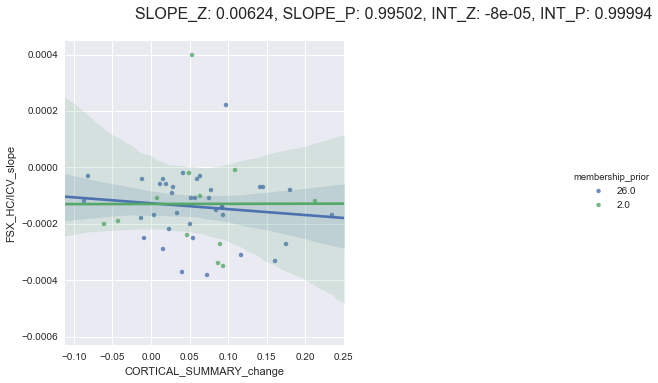

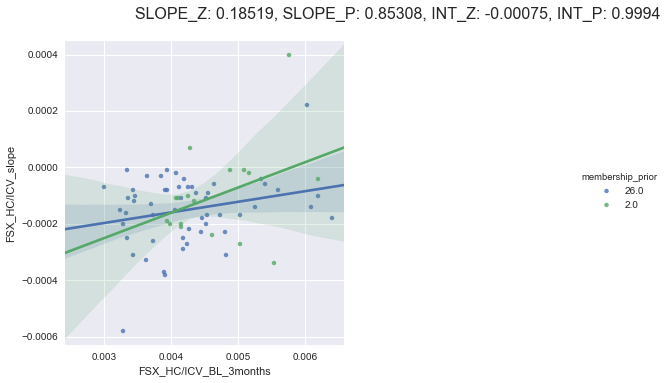

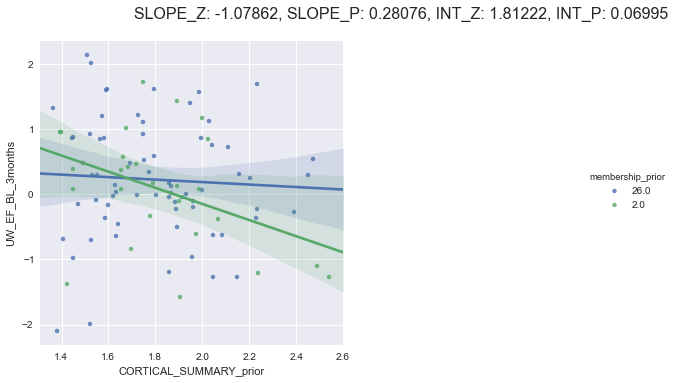

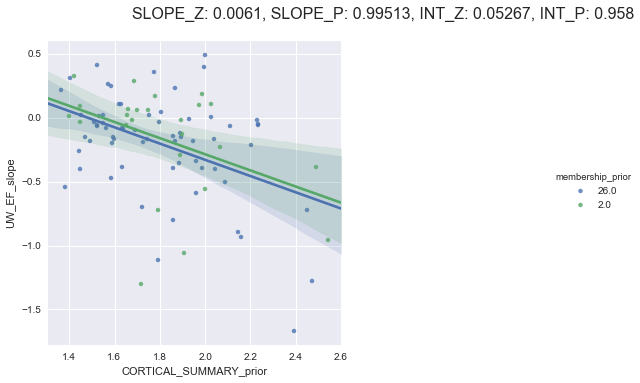

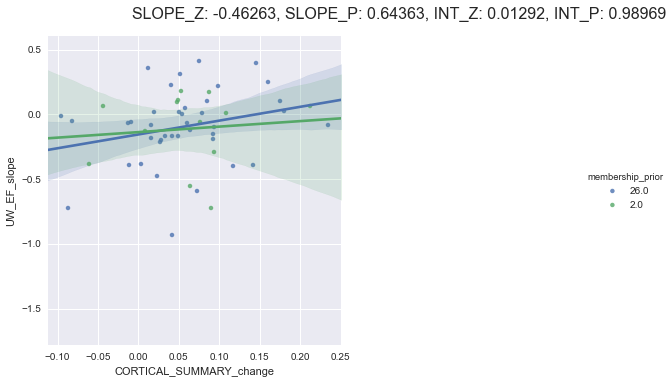

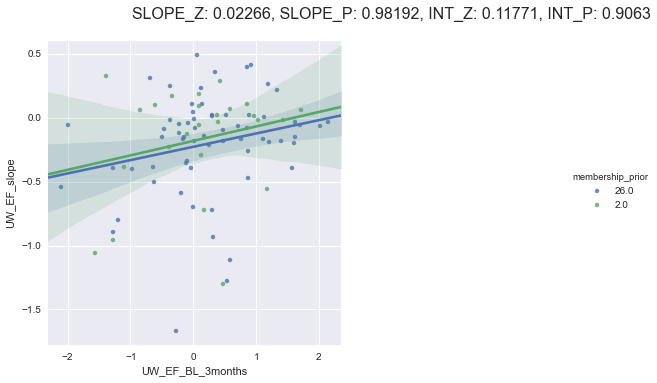

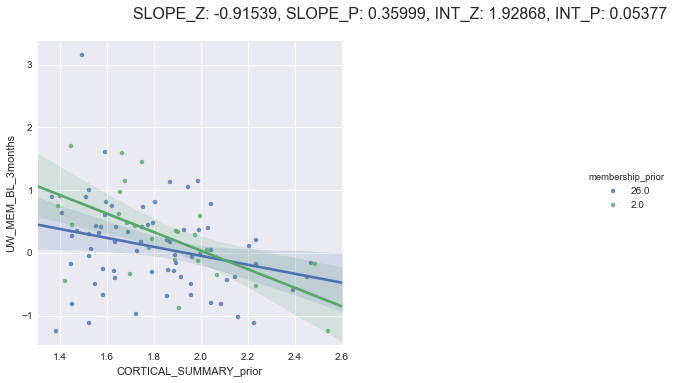

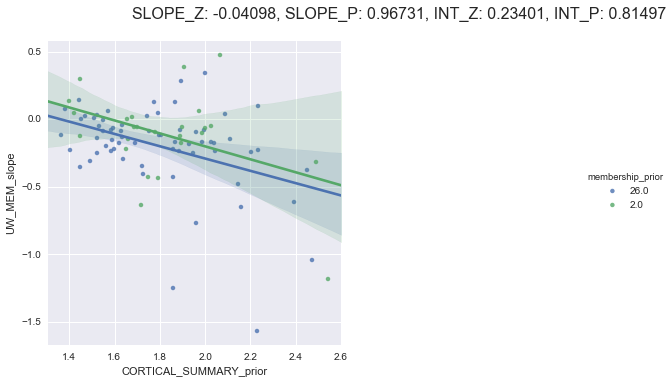

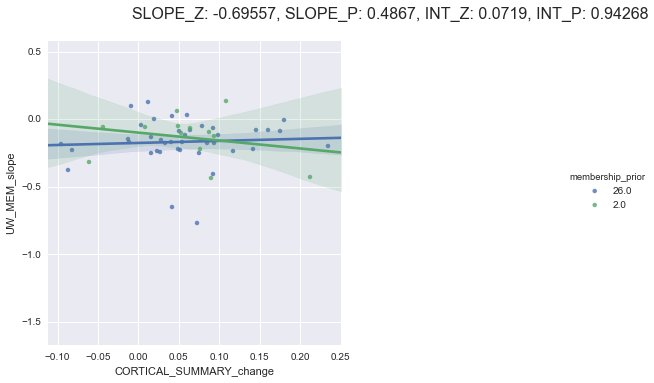

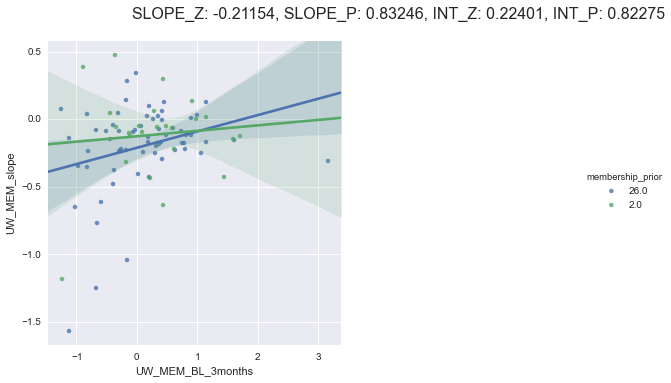

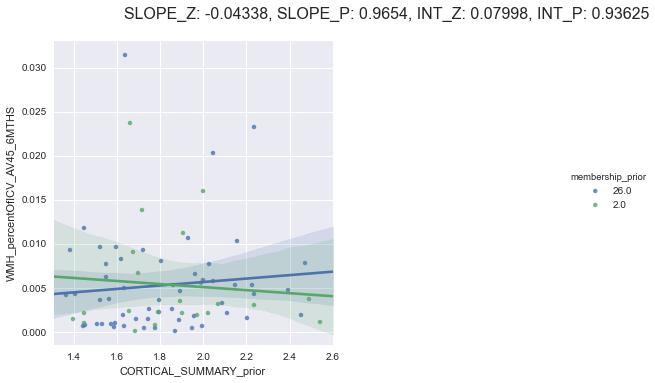

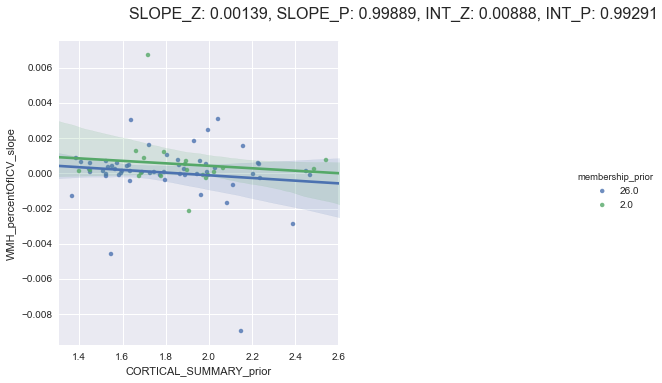

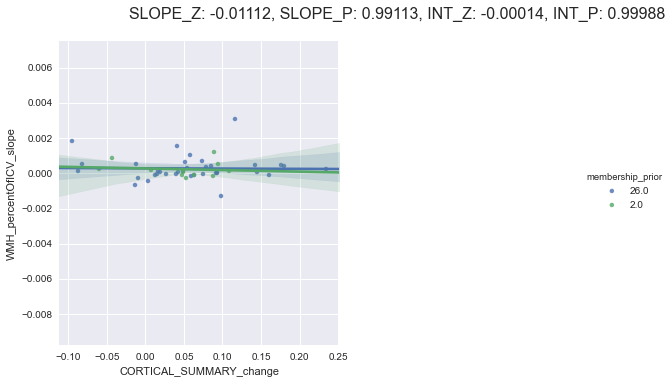

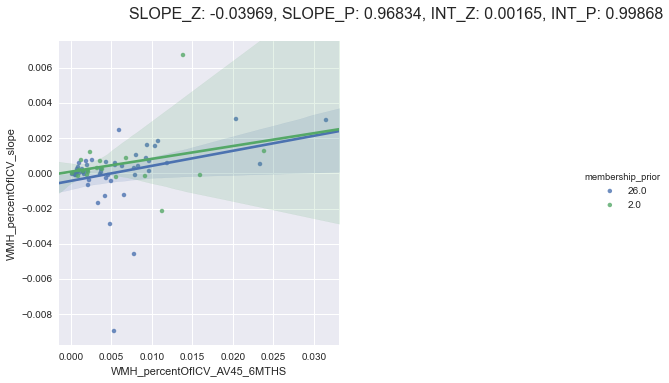

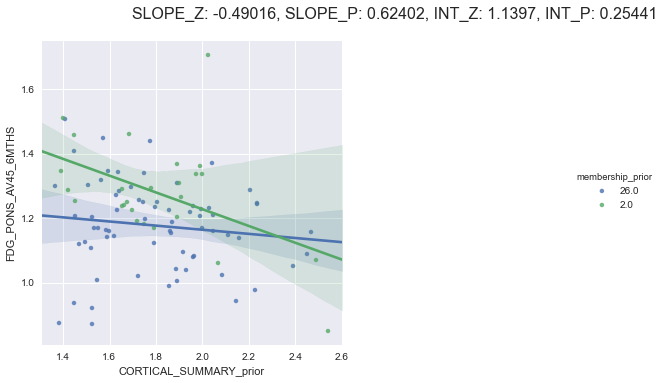

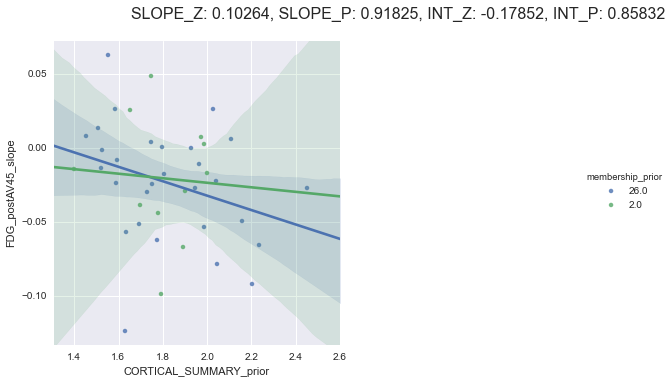

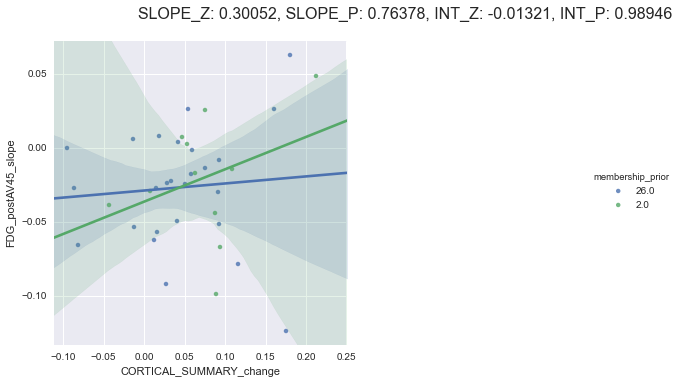

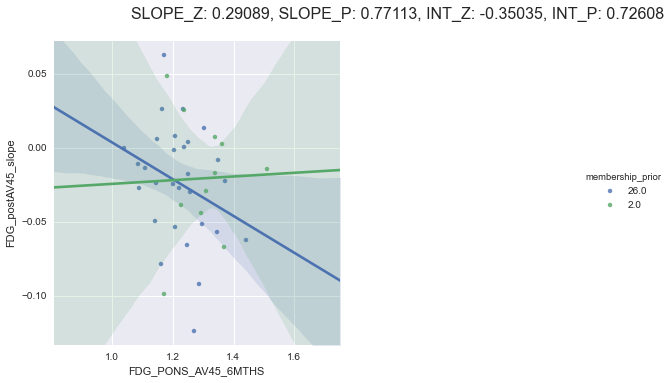

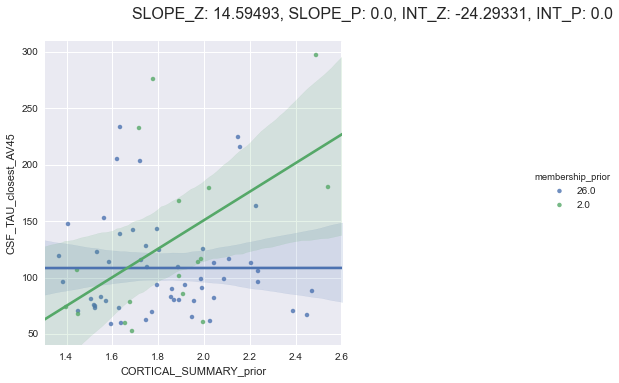

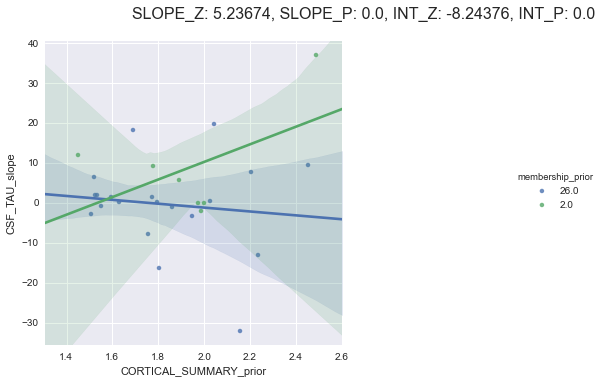

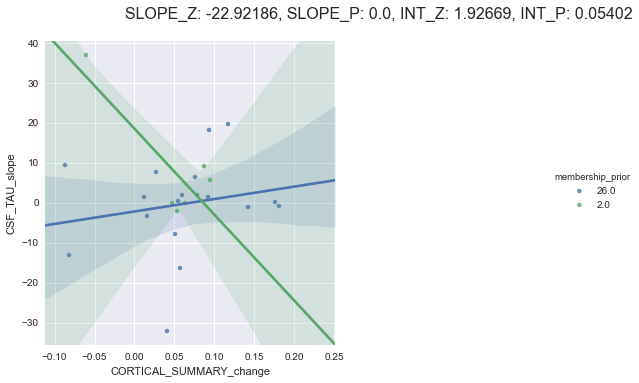

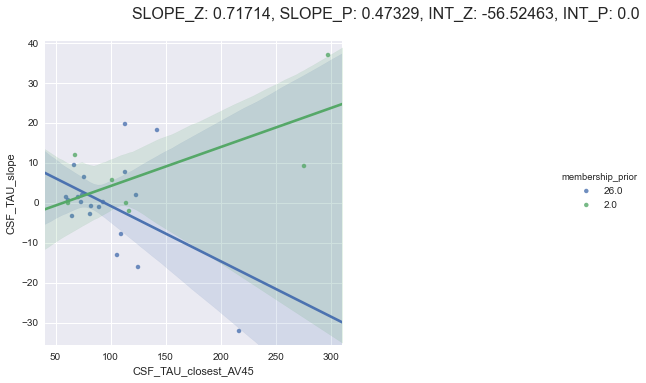

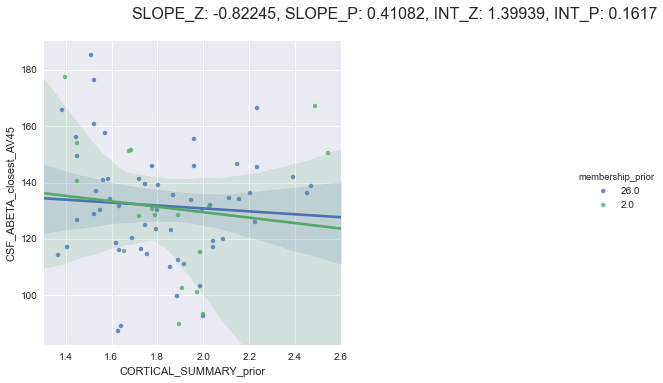

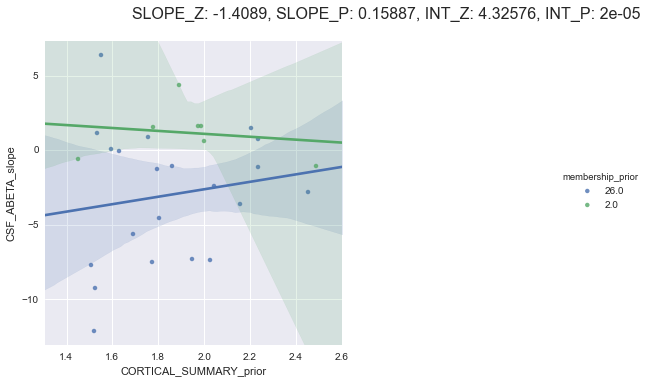

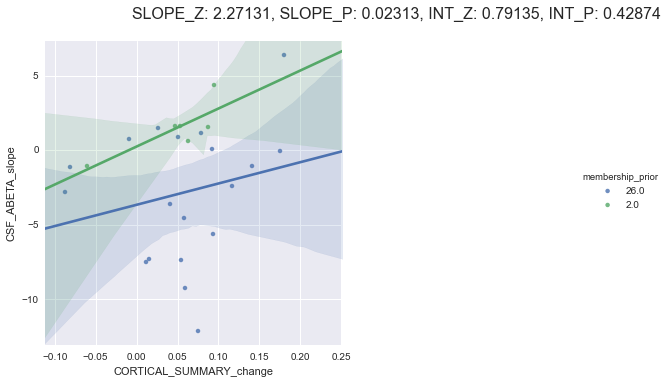

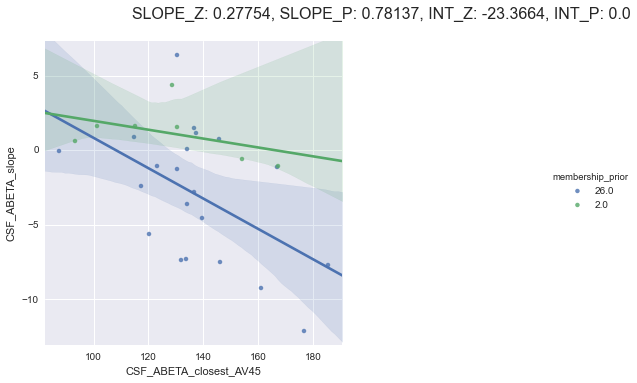

In [6]:
plotValueScatter(result_df, [2,26], xys=to_scatter, fit_reg=True, test=True)

SLOPE_Z: -0.05128, SLOPE_P: 0.95911, INT_Z: 0.11176, INT_P: 0.91101
SLOPE_Z: -0.01184, SLOPE_P: 0.99055, INT_Z: 0.02908, INT_P: 0.9768
SLOPE_Z: 0.02544, SLOPE_P: 0.97971, INT_Z: 0.00098, INT_P: 0.99922
SLOPE_Z: 0.19539, SLOPE_P: 0.84508, INT_Z: -0.00052, INT_P: 0.99958
SLOPE_Z: -1.64266, SLOPE_P: 0.10045, INT_Z: 3.71185, INT_P: 0.00021
SLOPE_Z: 0.13576, SLOPE_P: 0.89201, INT_Z: -0.18237, INT_P: 0.85529
SLOPE_Z: 0.90532, SLOPE_P: 0.3653, INT_Z: -0.03781, INT_P: 0.96984
SLOPE_Z: 0.30048, SLOPE_P: 0.76381, INT_Z: 0.21932, INT_P: 0.8264
SLOPE_Z: -0.55067, SLOPE_P: 0.58186, INT_Z: 1.80074, INT_P: 0.07174
SLOPE_Z: -0.08069, SLOPE_P: 0.93569, INT_Z: 0.21279, INT_P: 0.83149
SLOPE_Z: 1.23619, SLOPE_P: 0.21639, INT_Z: -0.01368, INT_P: 0.98908
SLOPE_Z: 0.09627, SLOPE_P: 0.9233, INT_Z: -0.1064, INT_P: 0.91526
SLOPE_Z: -0.03683, SLOPE_P: 0.97062, INT_Z: 0.10988, INT_P: 0.9125
SLOPE_Z: -0.00125, SLOPE_P: 0.999, INT_Z: 0.02929, INT_P: 0.97663
SLOPE_Z: -0.05612, SLOPE_P: 0.95525, INT_Z: 0.02134, INT_P

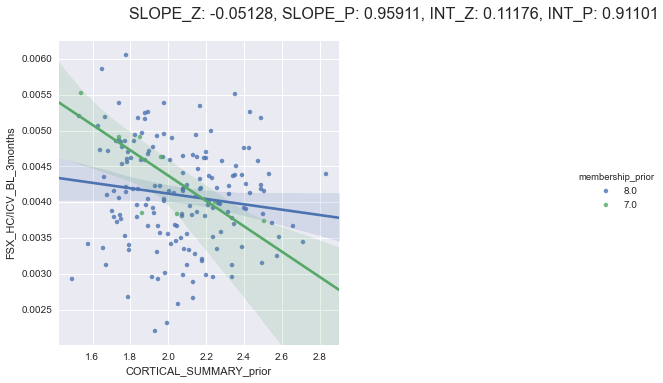

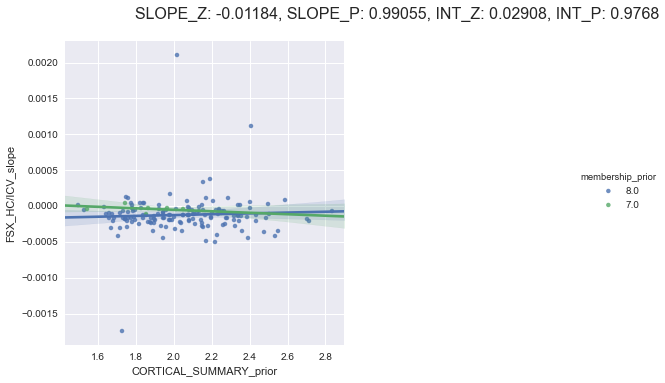

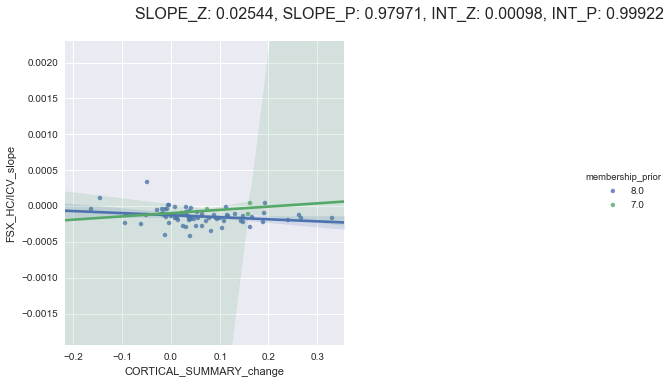

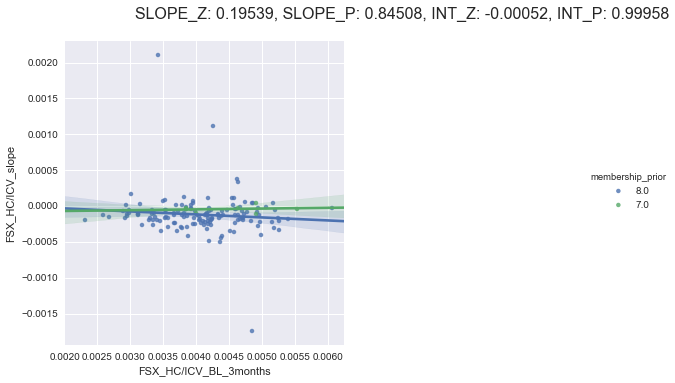

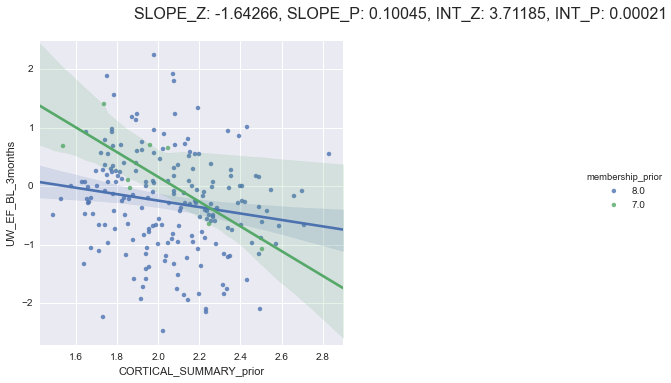

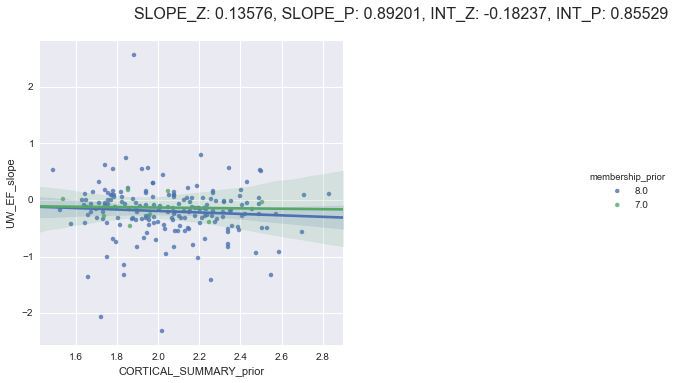

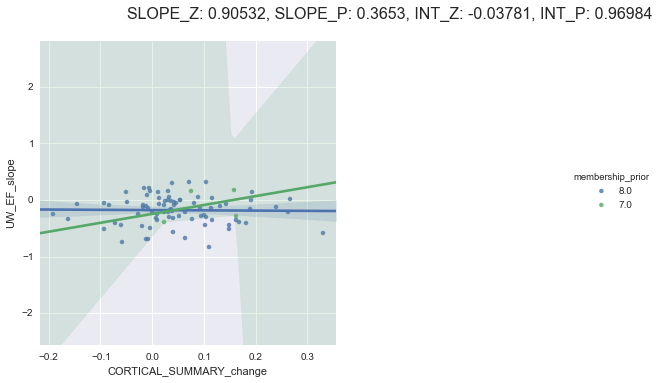

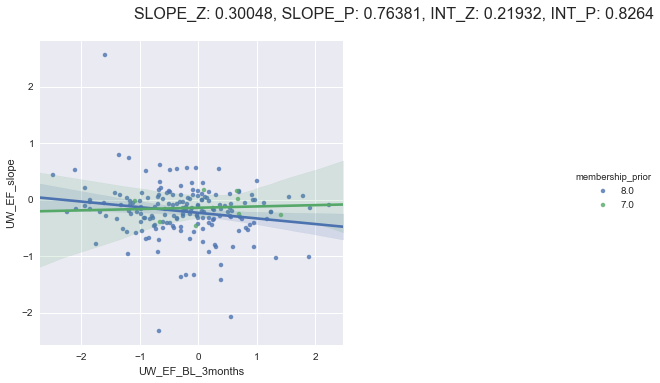

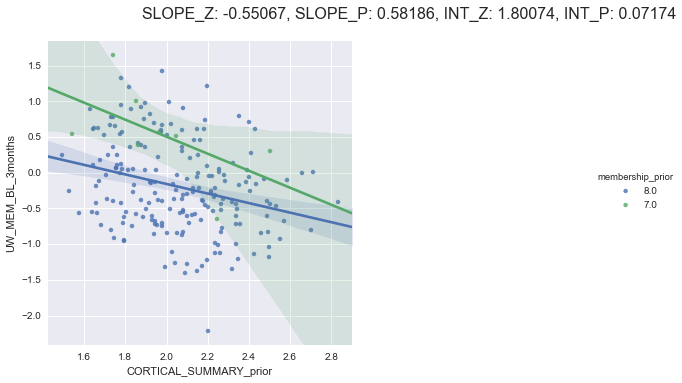

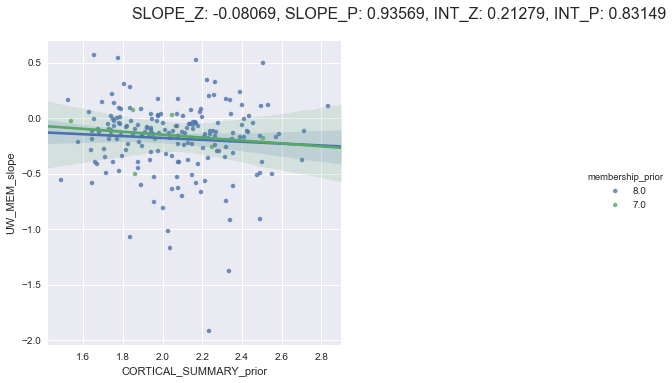

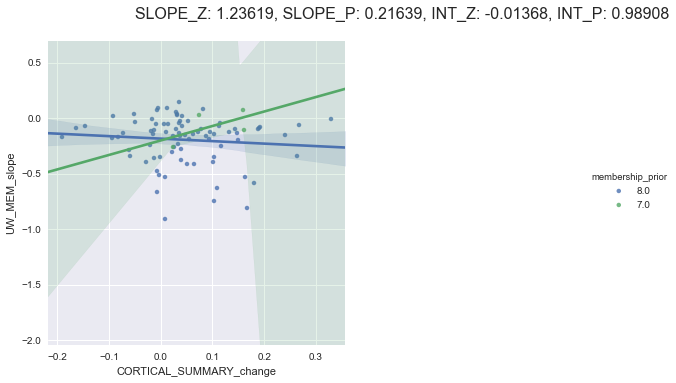

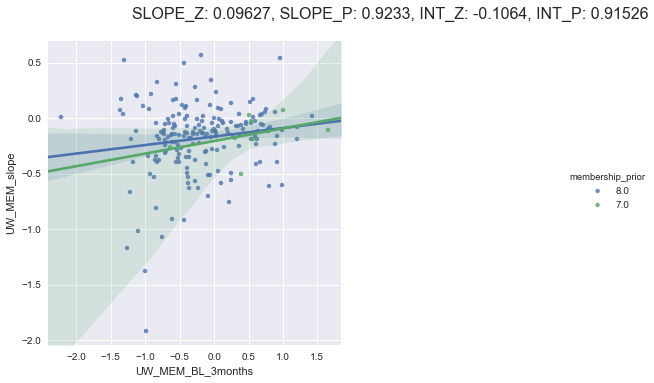

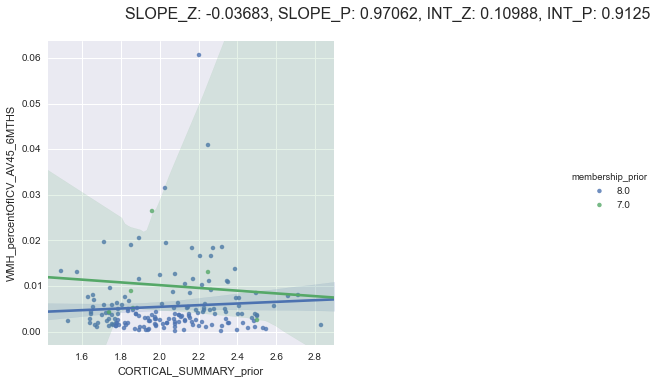

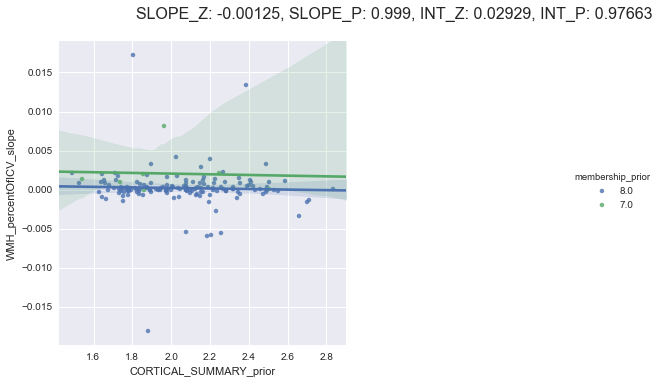

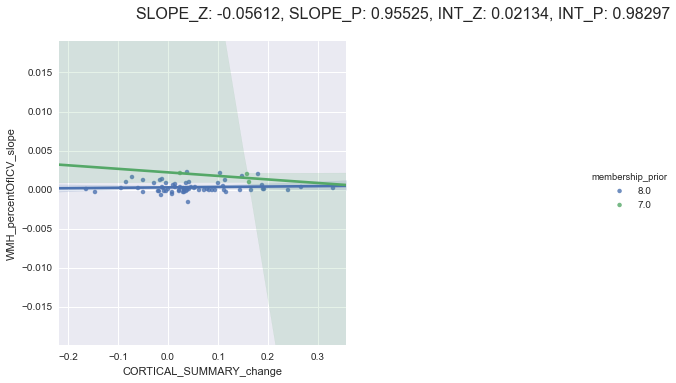

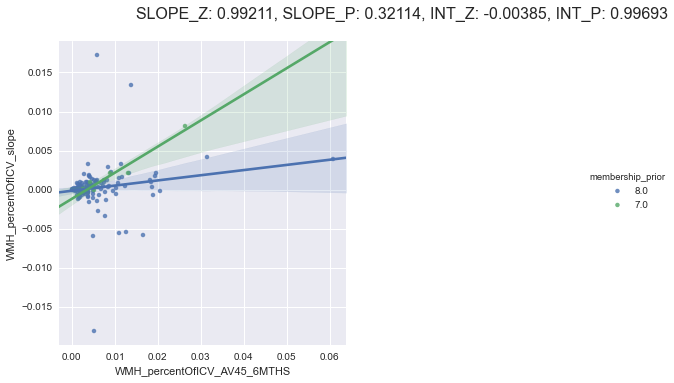

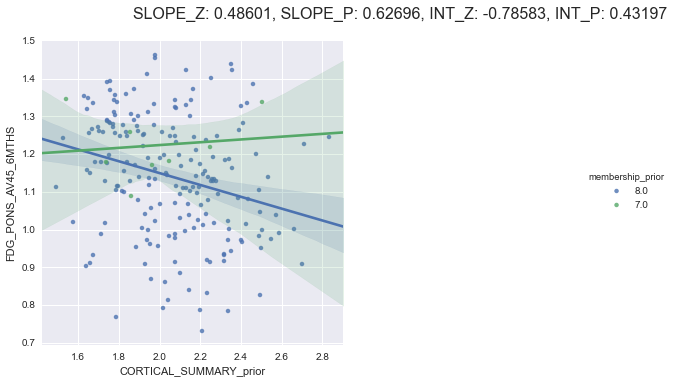

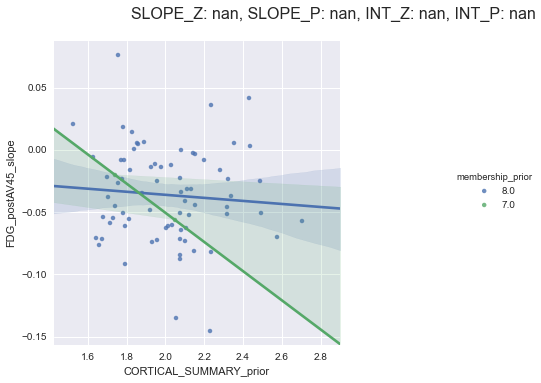

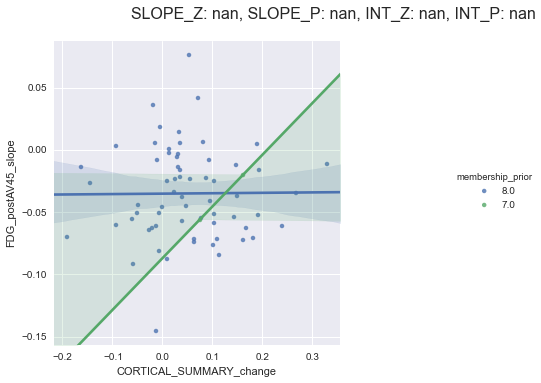

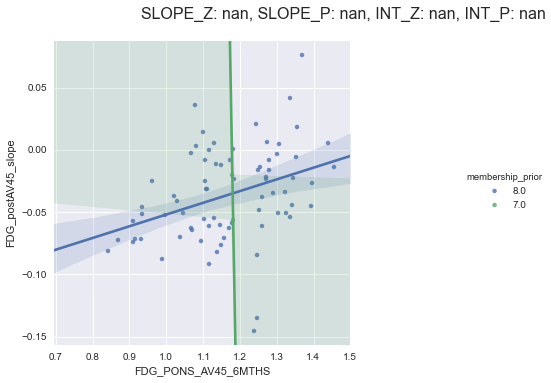

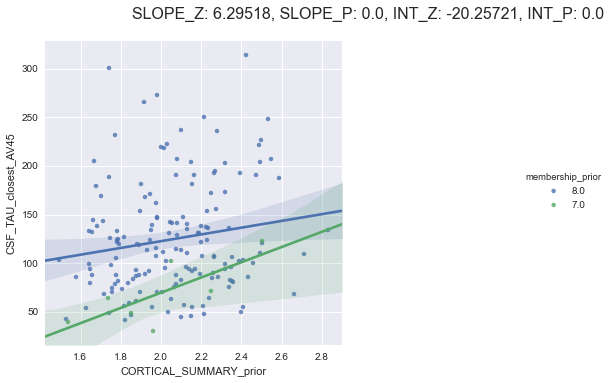

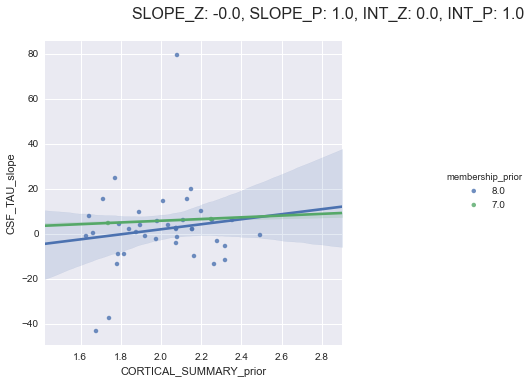

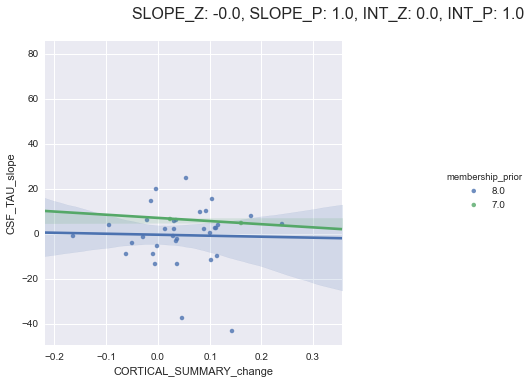

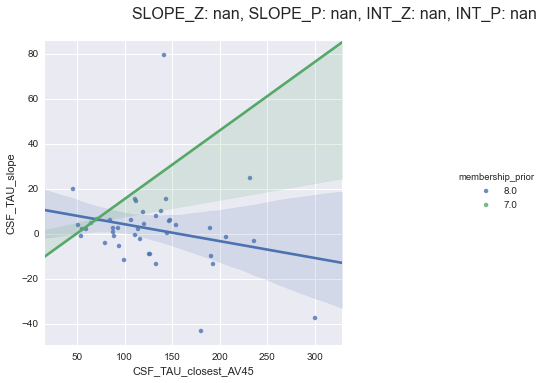

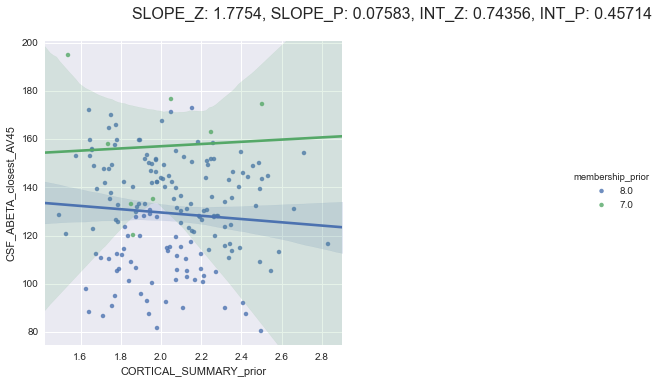

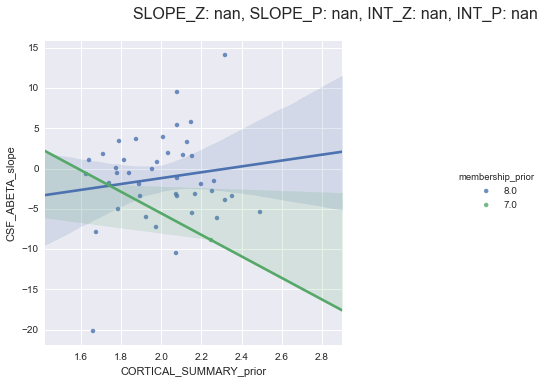

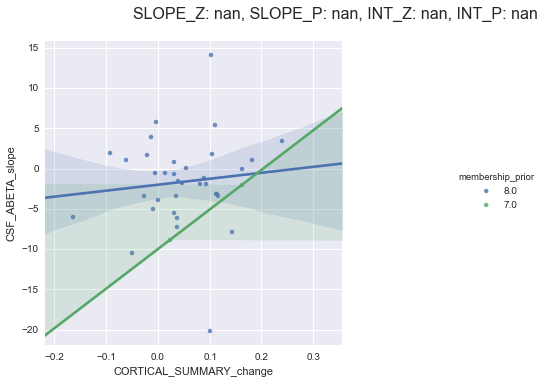

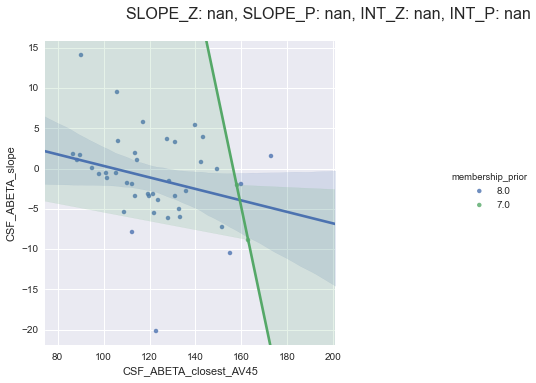

In [7]:
plotValueScatter(result_df, [7,8], xys=to_scatter, fit_reg=True, test=True)

SLOPE_Z: -0.03214, SLOPE_P: 0.97436, INT_Z: 0.06507, INT_P: 0.94812
SLOPE_Z: 0.00295, SLOPE_P: 0.99765, INT_Z: -0.00051, INT_P: 0.9996
SLOPE_Z: -0.00555, SLOPE_P: 0.99557, INT_Z: 0.00038, INT_P: 0.9997
SLOPE_Z: -0.04553, SLOPE_P: 0.96369, INT_Z: 0.00053, INT_P: 0.99958
SLOPE_Z: -0.84266, SLOPE_P: 0.39942, INT_Z: 2.21047, INT_P: 0.02707
SLOPE_Z: 0.66624, SLOPE_P: 0.50526, INT_Z: -1.20452, INT_P: 0.22839
SLOPE_Z: 0.71487, SLOPE_P: 0.47469, INT_Z: -0.02988, INT_P: 0.97616
SLOPE_Z: 0.09215, SLOPE_P: 0.92658, INT_Z: 0.28682, INT_P: 0.77425
SLOPE_Z: -0.01591, SLOPE_P: 0.9873, INT_Z: 0.5249, INT_P: 0.59966
SLOPE_Z: 0.50554, SLOPE_P: 0.61318, INT_Z: -1.00182, INT_P: 0.31643
SLOPE_Z: 1.96811, SLOPE_P: 0.04906, INT_Z: -0.0403, INT_P: 0.96785
SLOPE_Z: 0.02722, SLOPE_P: 0.97828, INT_Z: -0.06496, INT_P: 0.94821
SLOPE_Z: -0.01973, SLOPE_P: 0.98426, INT_Z: 0.04761, INT_P: 0.96203
SLOPE_Z: 0.01516, SLOPE_P: 0.9879, INT_Z: -0.01133, INT_P: 0.99096
SLOPE_Z: -0.03114, SLOPE_P: 0.97516, INT_Z: 0.01591, IN

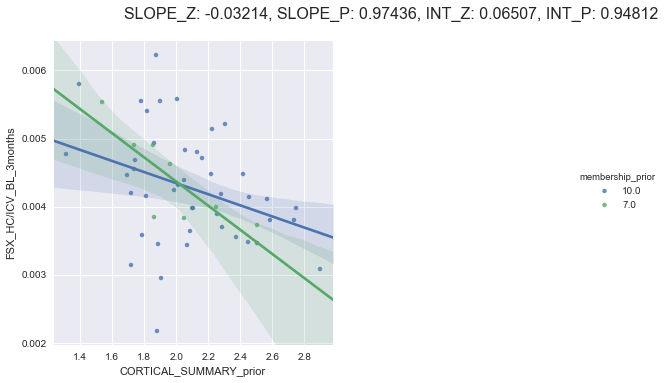

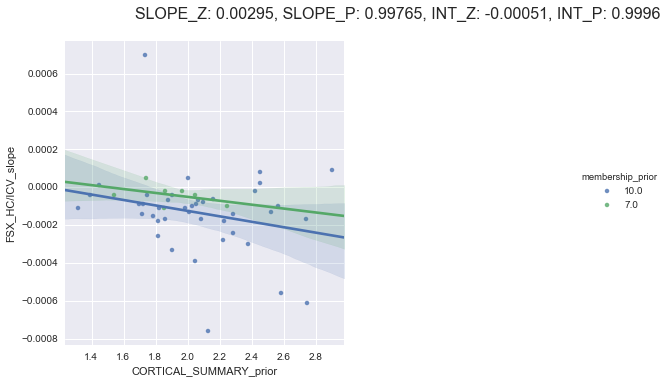

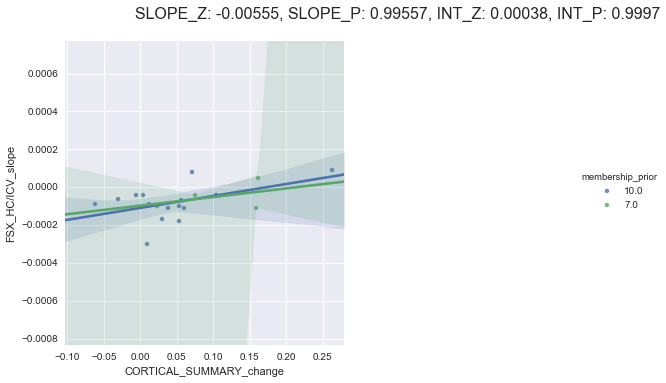

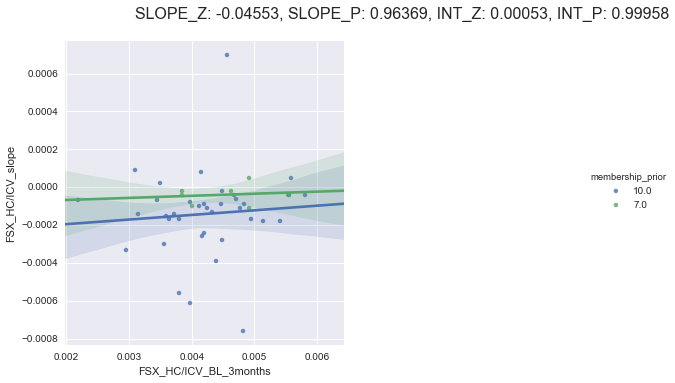

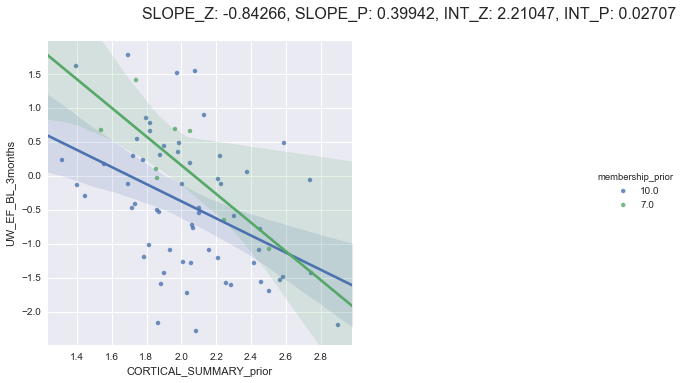

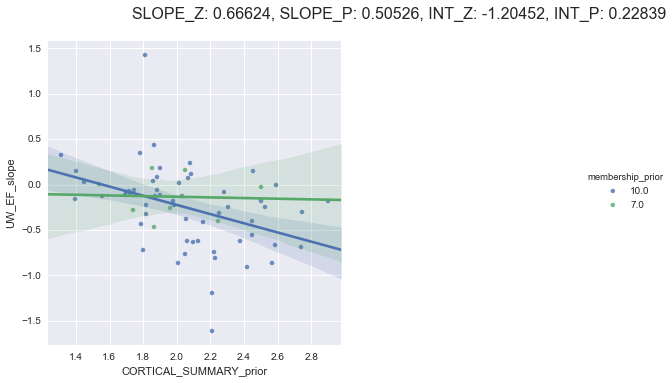

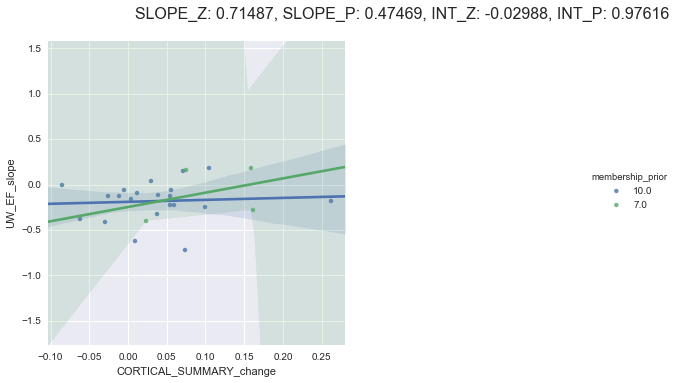

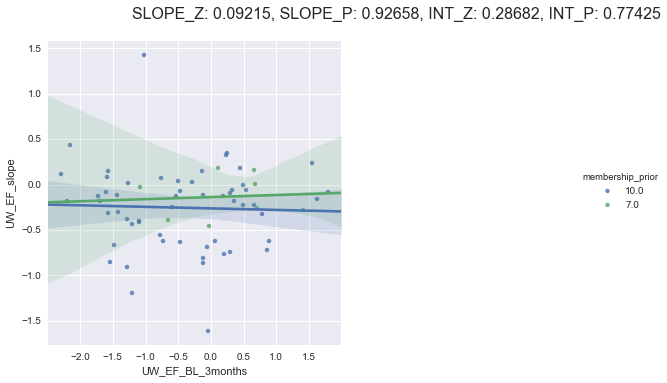

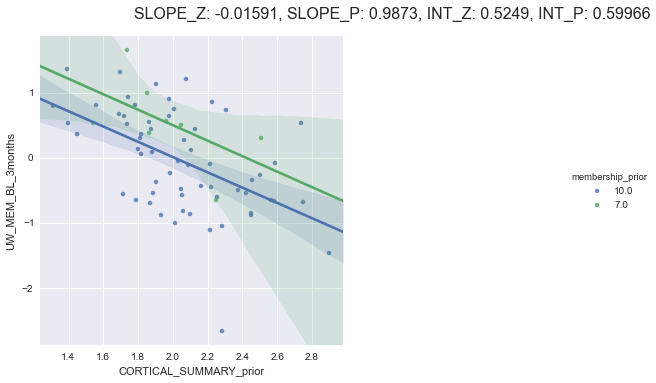

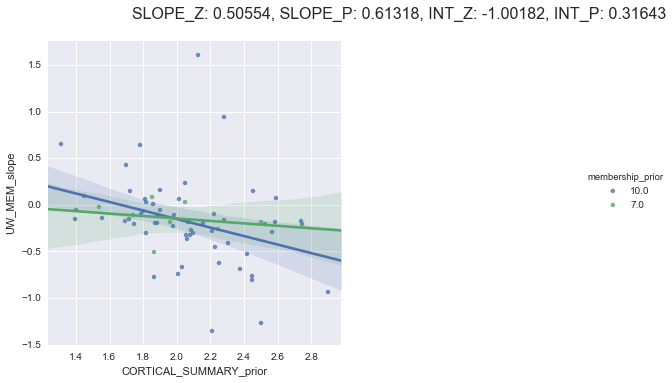

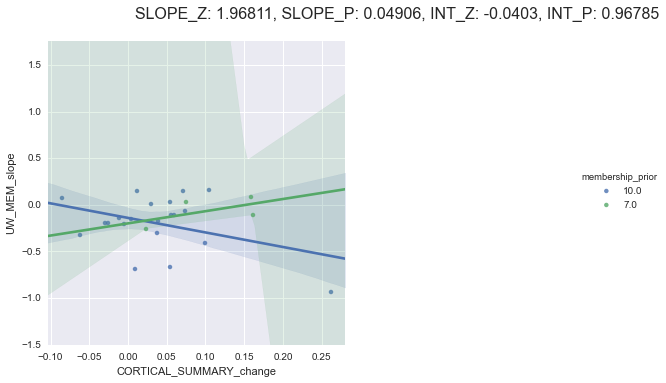

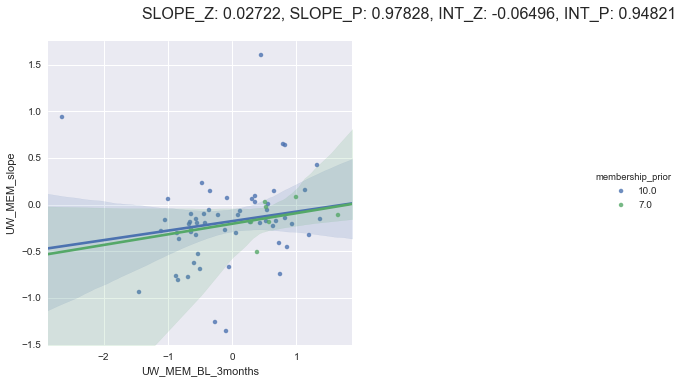

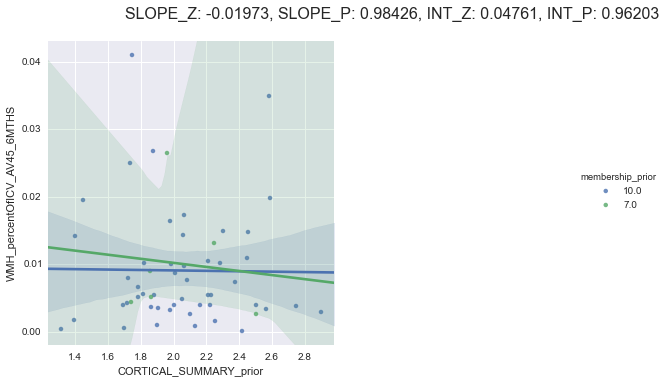

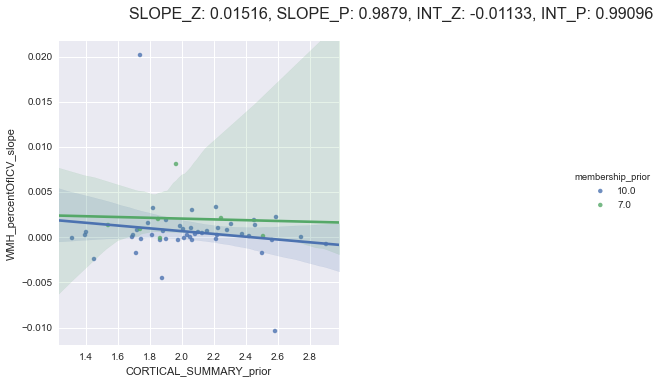

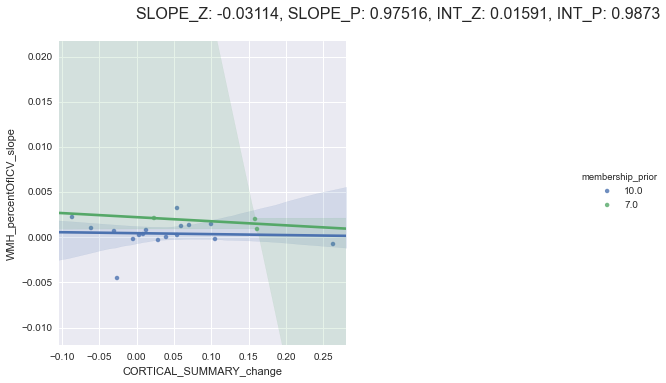

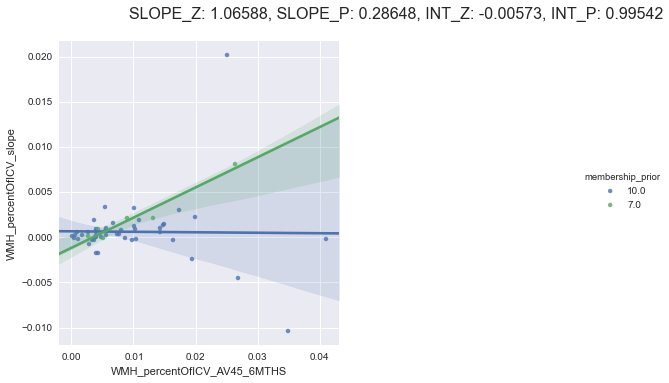

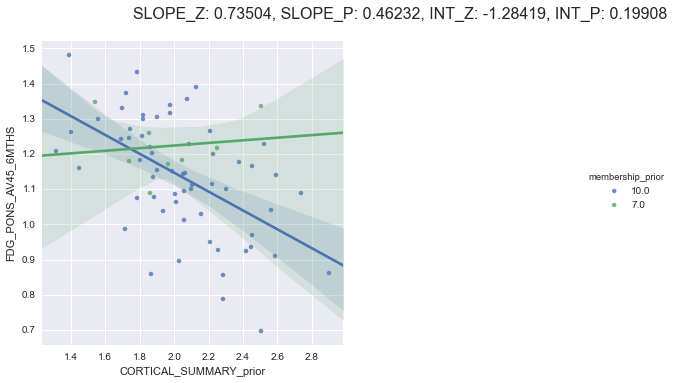

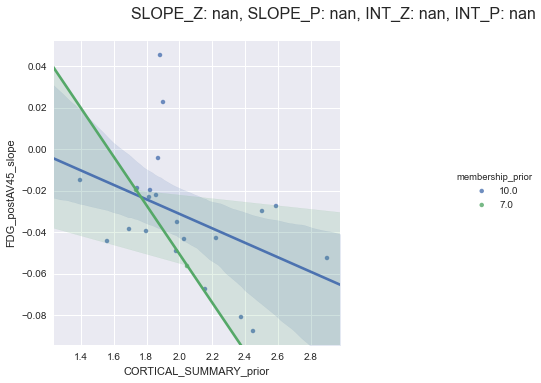

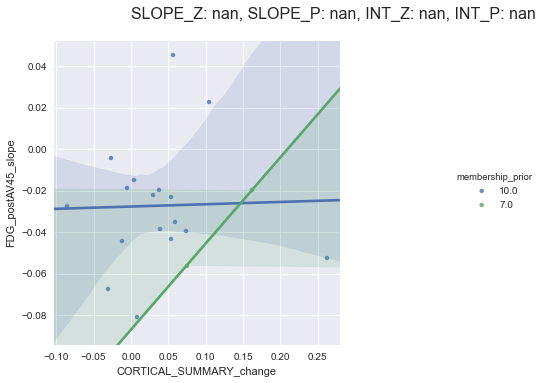

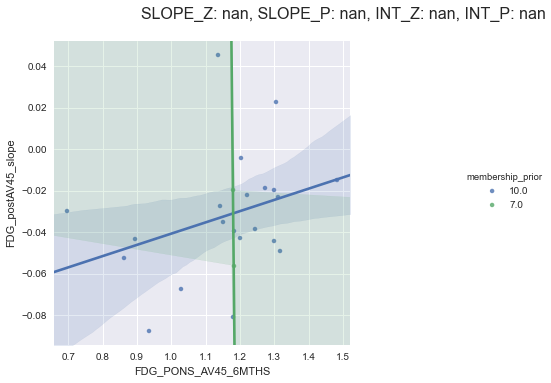

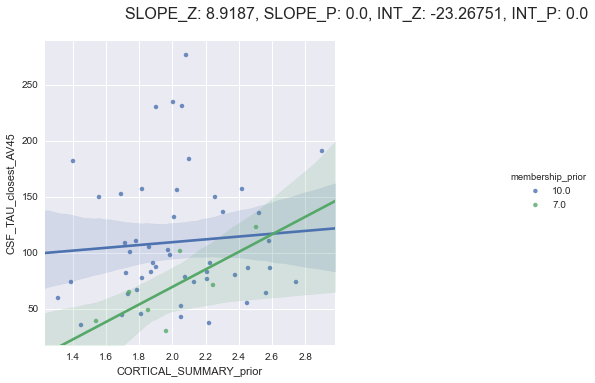

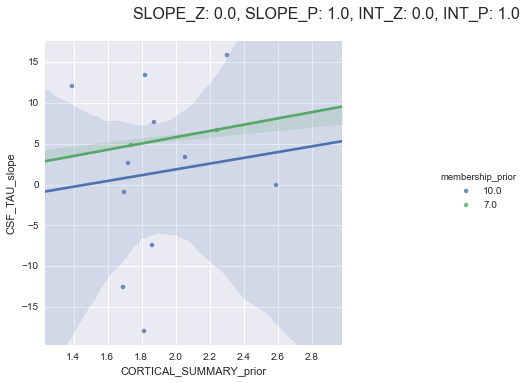

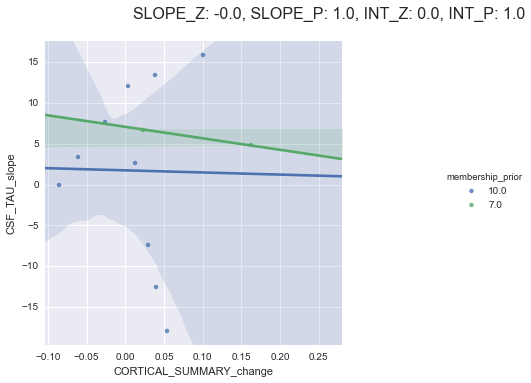

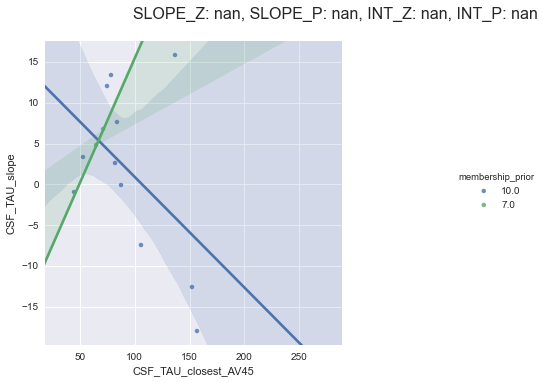

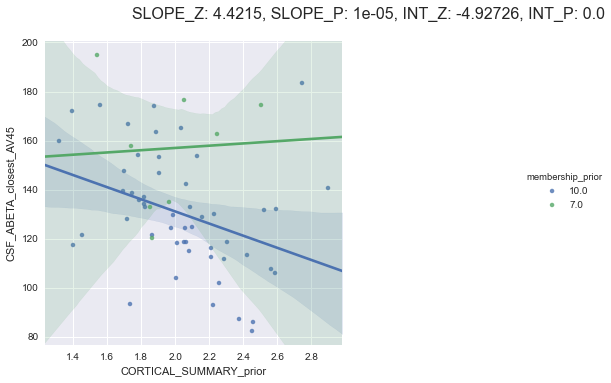

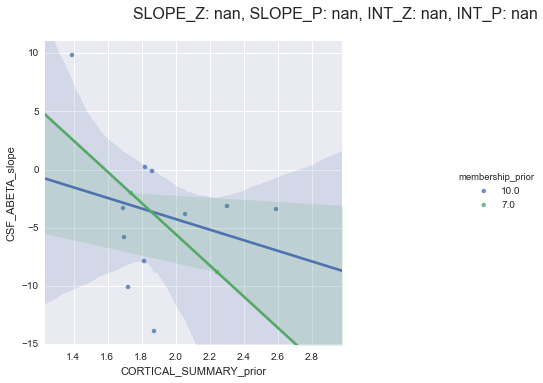

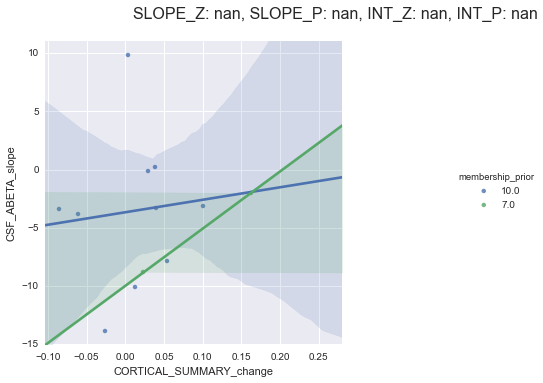

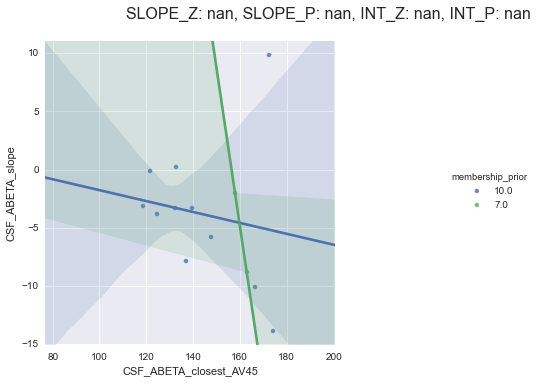

In [8]:
plotValueScatter(result_df, [7,10], xys=to_scatter, fit_reg=True, test=True)

SLOPE_Z: 0.01865, SLOPE_P: 0.98512, INT_Z: -0.04696, INT_P: 0.96255
SLOPE_Z: 0.01497, SLOPE_P: 0.98806, INT_Z: -0.02988, INT_P: 0.97616
SLOPE_Z: -0.04259, SLOPE_P: 0.96603, INT_Z: -0.00076, INT_P: 0.99939
SLOPE_Z: -0.22603, SLOPE_P: 0.82118, INT_Z: 0.00101, INT_P: 0.99919
SLOPE_Z: 0.9422, SLOPE_P: 0.34609, INT_Z: -1.71867, INT_P: 0.08568
SLOPE_Z: 0.69727, SLOPE_P: 0.48563, INT_Z: -1.3406, INT_P: 0.18005
SLOPE_Z: -0.26207, SLOPE_P: 0.79327, INT_Z: 0.0109, INT_P: 0.9913
SLOPE_Z: -0.25551, SLOPE_P: 0.79833, INT_Z: 0.10839, INT_P: 0.91368
SLOPE_Z: 0.78511, SLOPE_P: 0.43239, INT_Z: -1.83814, INT_P: 0.06604
SLOPE_Z: 0.73579, SLOPE_P: 0.46186, INT_Z: -1.51865, INT_P: 0.12885
SLOPE_Z: 1.27374, SLOPE_P: 0.20275, INT_Z: -0.03983, INT_P: 0.96823
SLOPE_Z: -0.07216, SLOPE_P: 0.94247, INT_Z: 0.03579, INT_P: 0.97145
SLOPE_Z: 0.02821, SLOPE_P: 0.97749, INT_Z: -0.10464, INT_P: 0.91666
SLOPE_Z: 0.02492, SLOPE_P: 0.98012, INT_Z: -0.05911, INT_P: 0.95286
SLOPE_Z: 0.01996, SLOPE_P: 0.98408, INT_Z: -0.00184

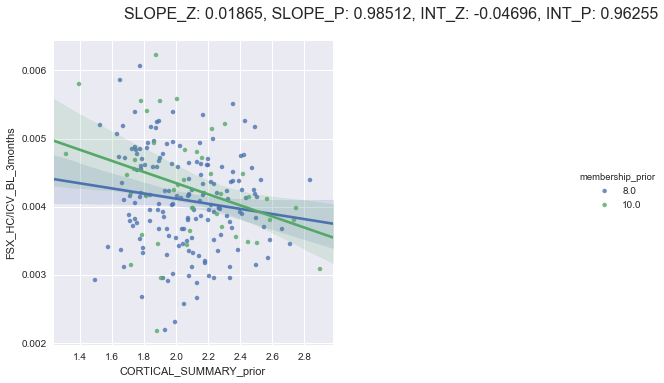

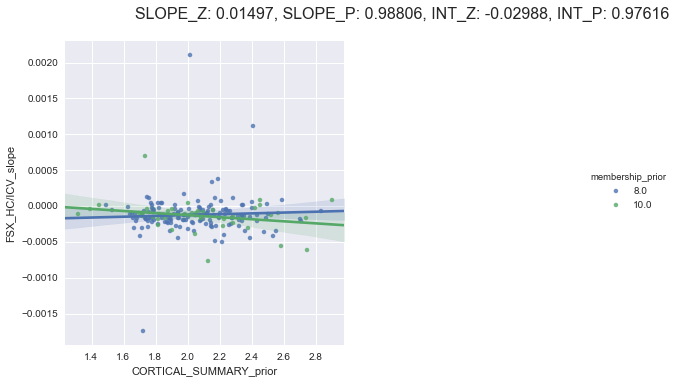

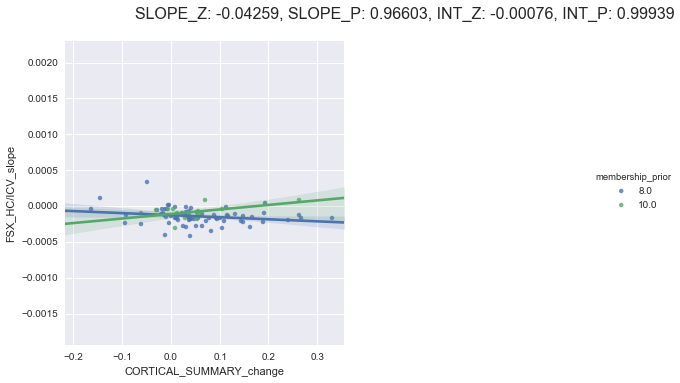

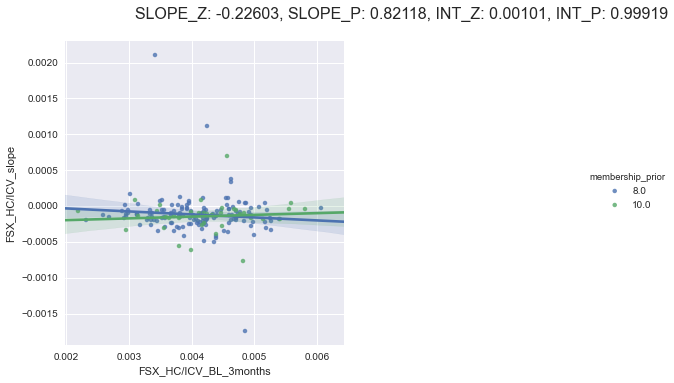

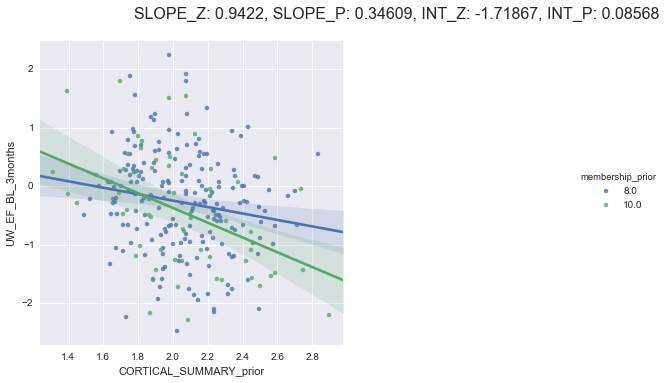

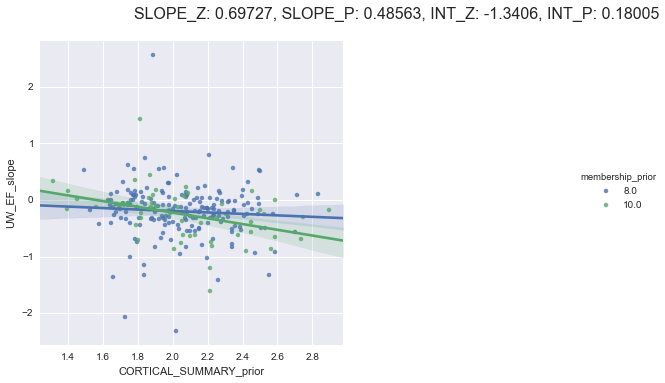

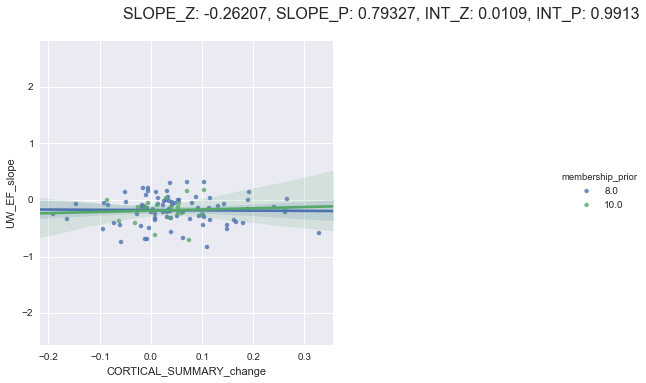

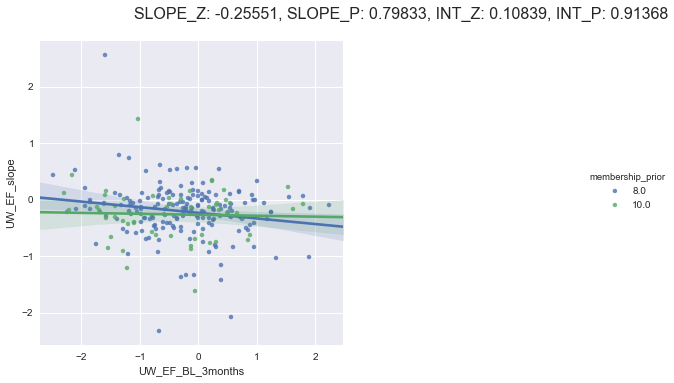

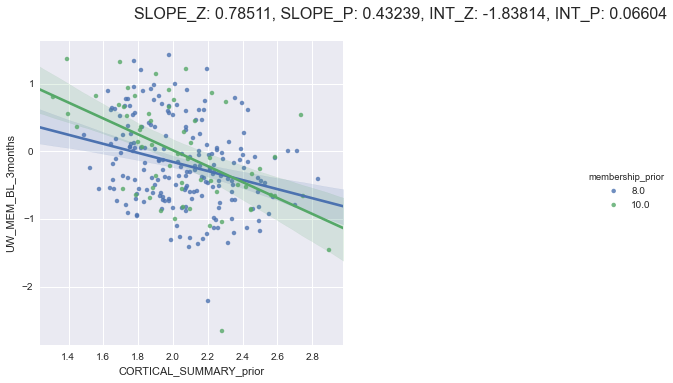

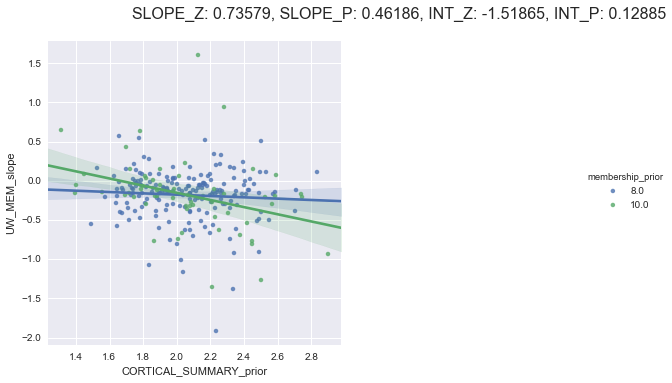

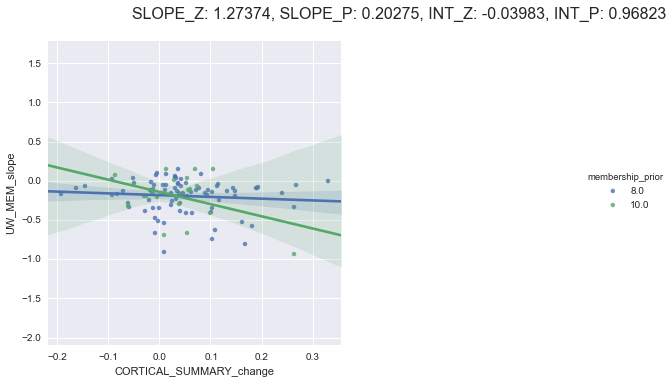

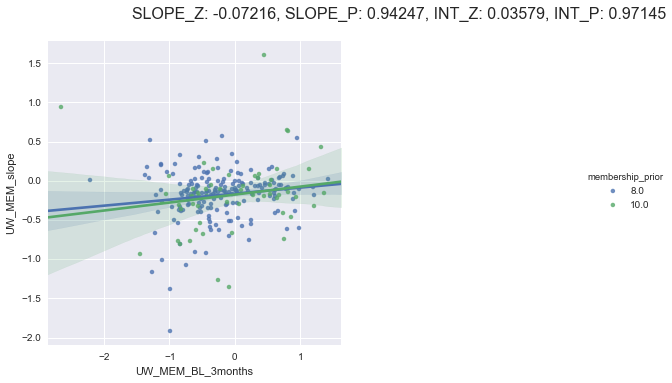

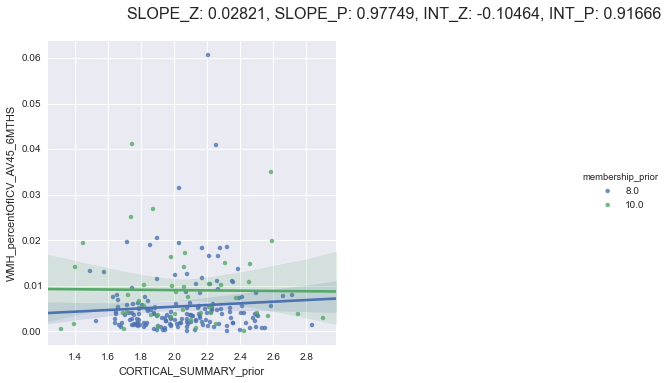

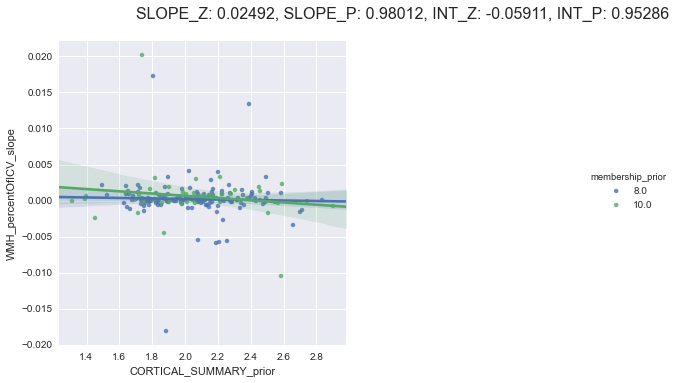

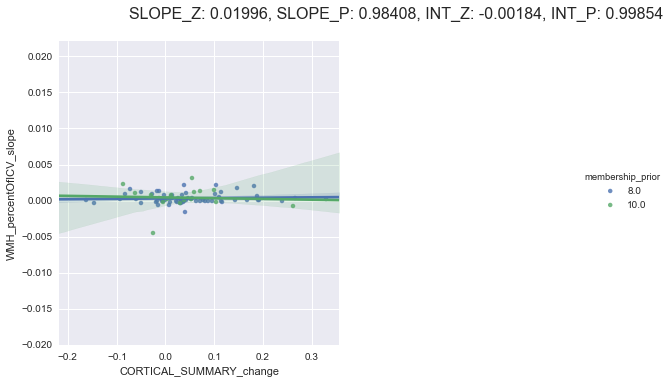

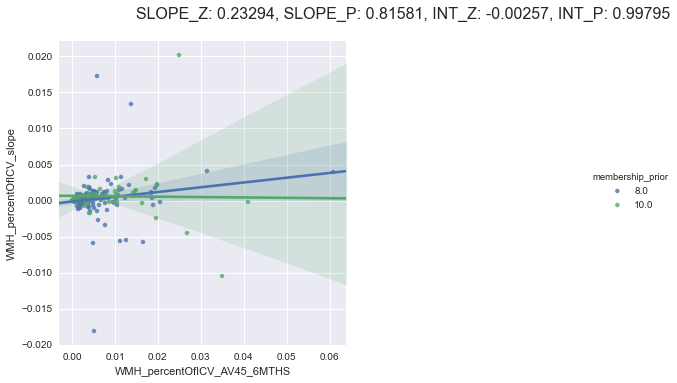

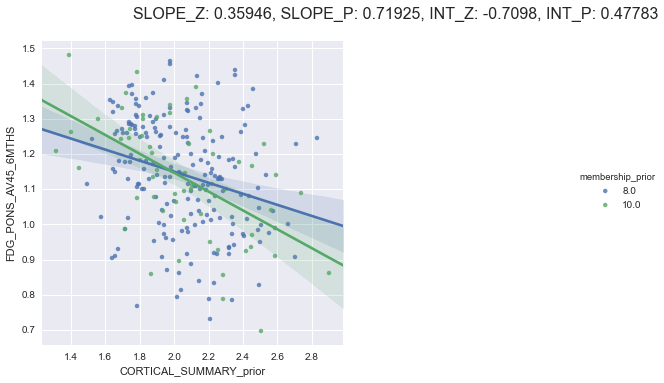

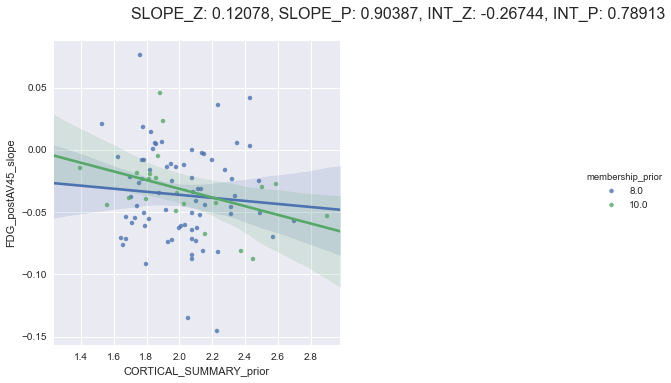

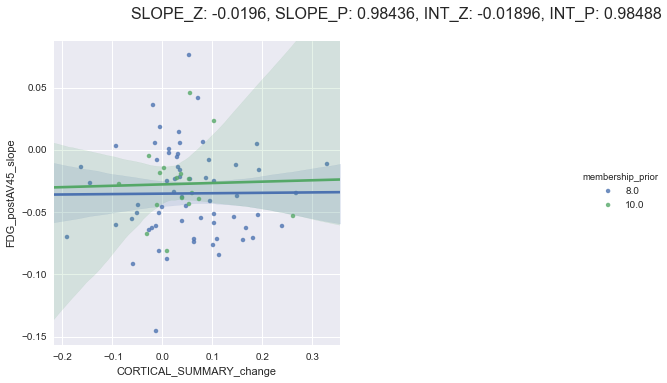

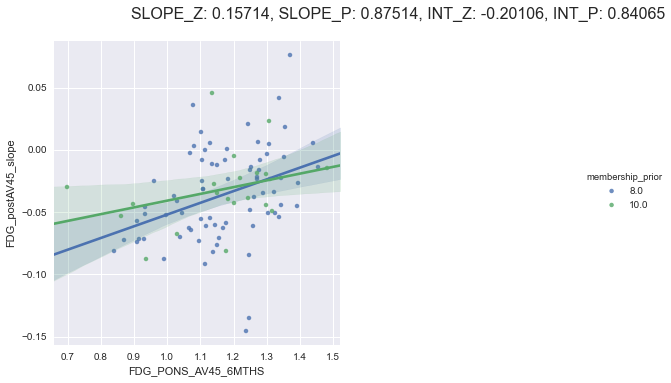

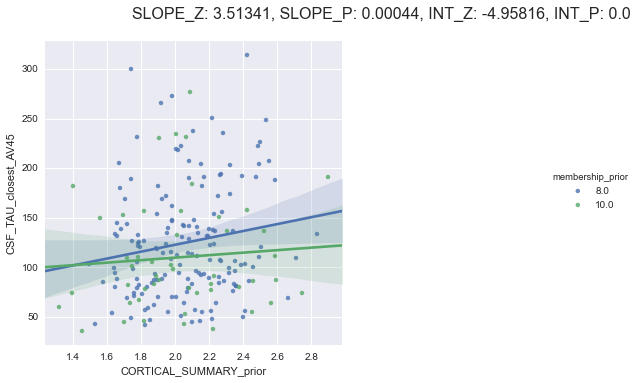

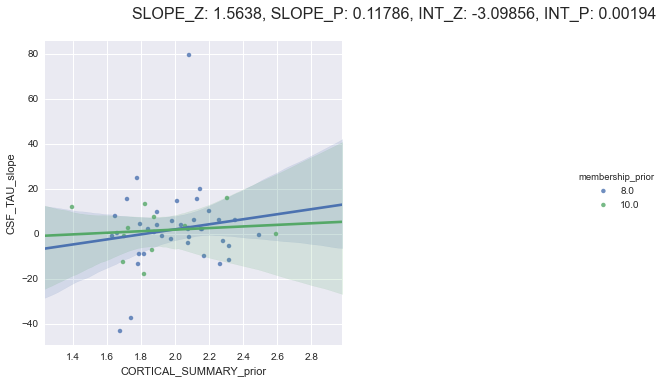

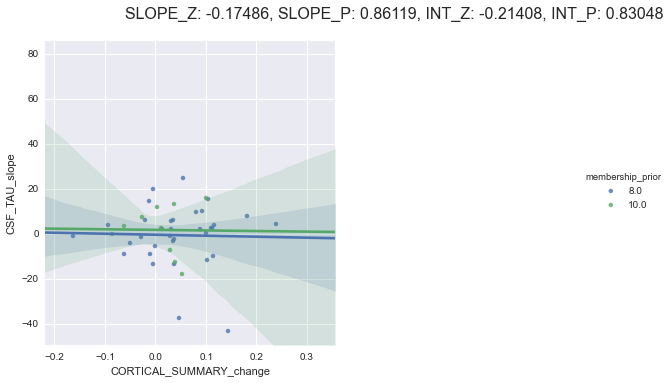

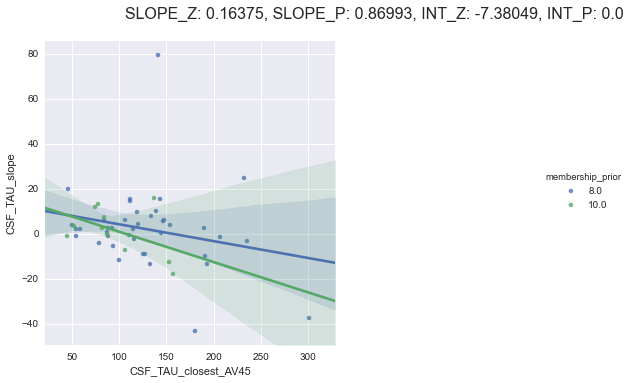

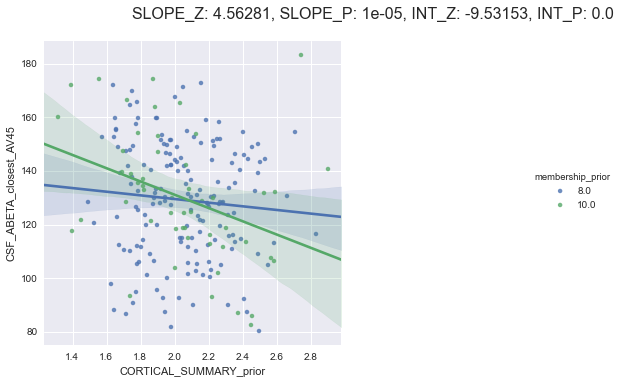

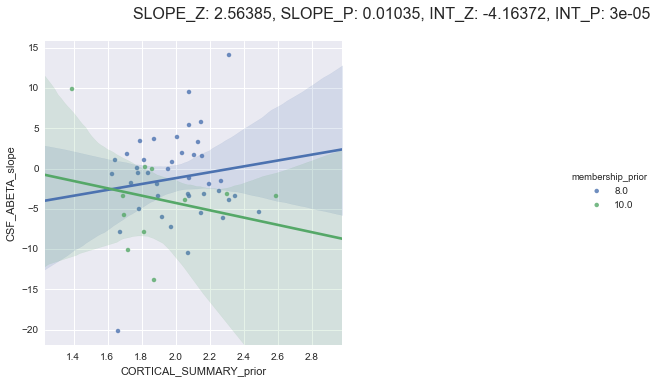

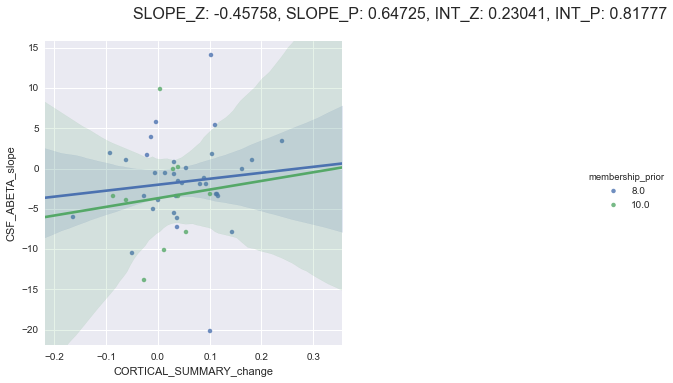

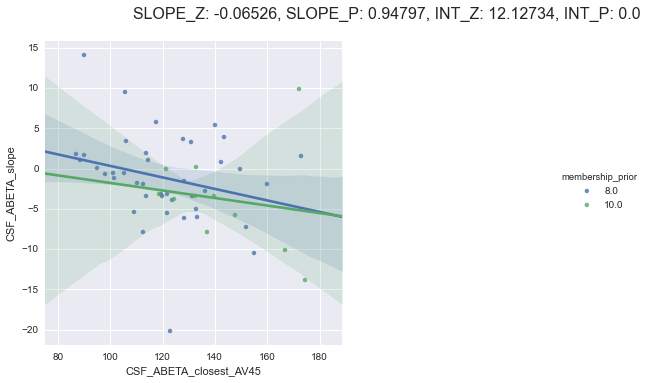

In [9]:
plotValueScatter(result_df, [8,10], xys=to_scatter, fit_reg=True, test=True)